# Problem Statement

In [ ]:
To predict 'Average Price for two' and 'Price Range' for zomato restaurant based upon the data provided

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv",encoding="ISO-8859-1")
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df2 = pd.read_excel(r"C:\Users\Swati\OneDrive\Desktop\DataScience\Country-Code.xlsx")
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
df = pd.merge (df1,df2)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [5]:
colllist = df.columns
colllist

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

From the above info we observed that the feature 'Cuisines' has some missing values.

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Let's check for missing values

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

The feature 'Cuisines' has 9 missing values

In [9]:
df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

Most of the record are from India.

# Missing value Imputation

In [10]:
# Since 'Cuisines' is a categorical feature we will use mode to impute missing valuesCuisines
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [11]:
# Let's check whether null values are filled
df['Cuisines'].isnull().sum()

0

Means all the null values are filled.

# Let's check for duplicate entries

In [12]:
df.duplicated().sum()

0

Means there are no duplicate entries in the dataset

In [13]:
for i in colllist:
    print(df[i].value_counts())

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1
Flaxt

In [14]:
country_names = df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [15]:
country_val = df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x1ac00a1a9d0>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

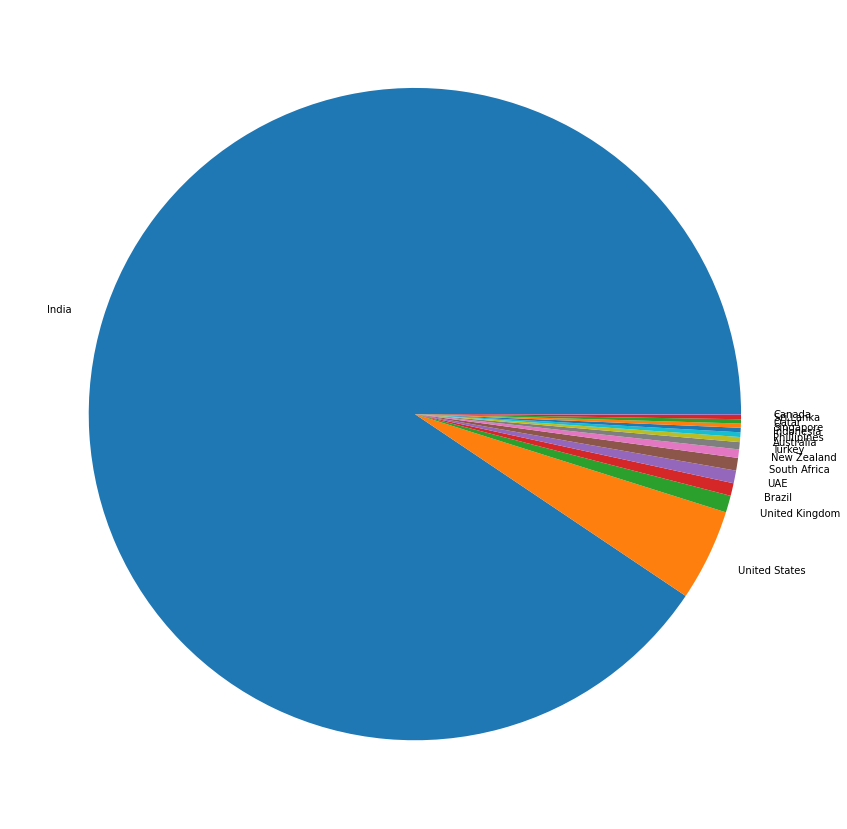

In [16]:
plt.figure(figsize=(20,15))
plt.pie(country_val, labels = country_names)

# Top 5 countries using Zomato

([<matplotlib.patches.Wedge at 0x1ac01136e50>,
 [Text(-1.07479320772197, 0.23413577393196094, 'India'),
  Text(1.056503577535216, -0.3062681678779072, 'United States'),
  Text(1.093560093908513, -0.118854200644337, 'United Kingdom'),
  Text(1.0979610170116392, -0.06694479160298568, 'Brazil'),
  Text(1.0997733864424146, -0.022327079365287286, 'UAE')],
 [Text(-0.5862508405756199, 0.12771042214470596, '93.2%'),
  Text(0.5762746786555722, -0.1670553642970403, '4.7%'),
  Text(0.596487323950098, -0.06482956398782018, '0.9%'),
  Text(0.598887827460894, -0.03651534087435582, '0.6%'),
  Text(0.5998763926049533, -0.012178406926520337, '0.6%')])

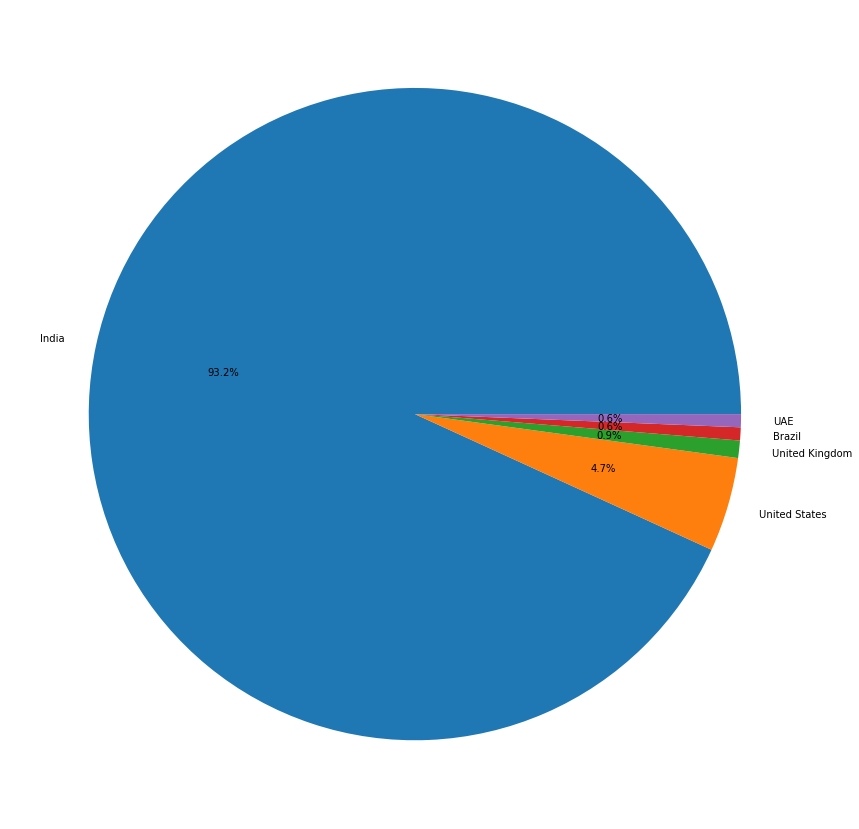

In [17]:
plt.figure(figsize=(20,15))
plt.pie(country_val[:5], labels = country_names[:5],autopct='%3.1f%%')

India, United States, United Kingdom, Brazil and UAE are the top 5 Countries using Zomato.

In [18]:
ratings = df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Observations

1. Most of the customers like to give no ratings.

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

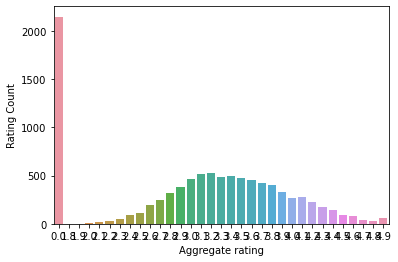

In [19]:
sns.barplot(x='Aggregate rating', y='Rating Count', data = ratings )

<AxesSubplot:xlabel='Rating color', ylabel='count'>

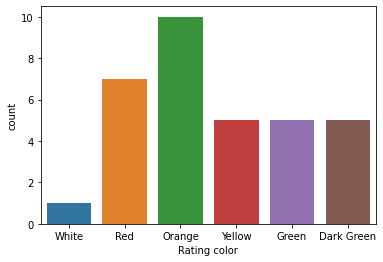

In [20]:
sns.countplot(x = 'Rating color', data= ratings)

The count of white rating color is very low where the count of orange rating color is very high.

In [21]:
# Let's check for countries who are giving 0 ratings
df[df['Aggregate rating']==0.0].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


 Maximum numbers of 0 ratings are given in India i.e. 2139
 minimum numbers of 0 ratings i.e 1 is given in United Kingdom.b

In [22]:
# Let's groupby currency
df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [23]:
# Let's find the countries with online delivery facility
df[df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [24]:
df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Only India and UAE has online delivery facility
The remaining countries don't have online delivery facility
Also for some locations in India there is no online delivery facility.

In [25]:
#Let's check for citywise distribution
city_values = df.City.value_counts().values
city_lebels = df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x1ac01648070>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')])

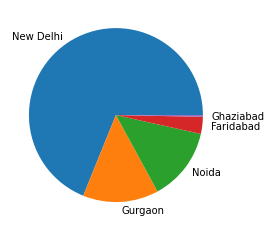

In [26]:
#let's plot a pie chart for top 5 cities
plt.pie(city_values[:5],labels=city_lebels[:5])

The maximum transactions are made in the city New Delhi

In [27]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [28]:
# Drop the unnecessary features
df.drop(['Restaurant ID','Restaurant Name','Address','Locality','Locality Verbose'],axis=1,inplace=True)

In [29]:
df.head()

,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [30]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Country Code', 'Average Cost for two', 'Price range', 'Votes'], float64: ['Longitude', 'Latitude', 'Aggregate rating'], object: ['City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']}

In [31]:
num = ['Country Code', 'Average Cost for two', 'Price range', 'Votes','Longitude', 'Latitude', 'Aggregate rating']

In [32]:
cat = ['City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']

# Visualization

# categorical features

# 1. Country

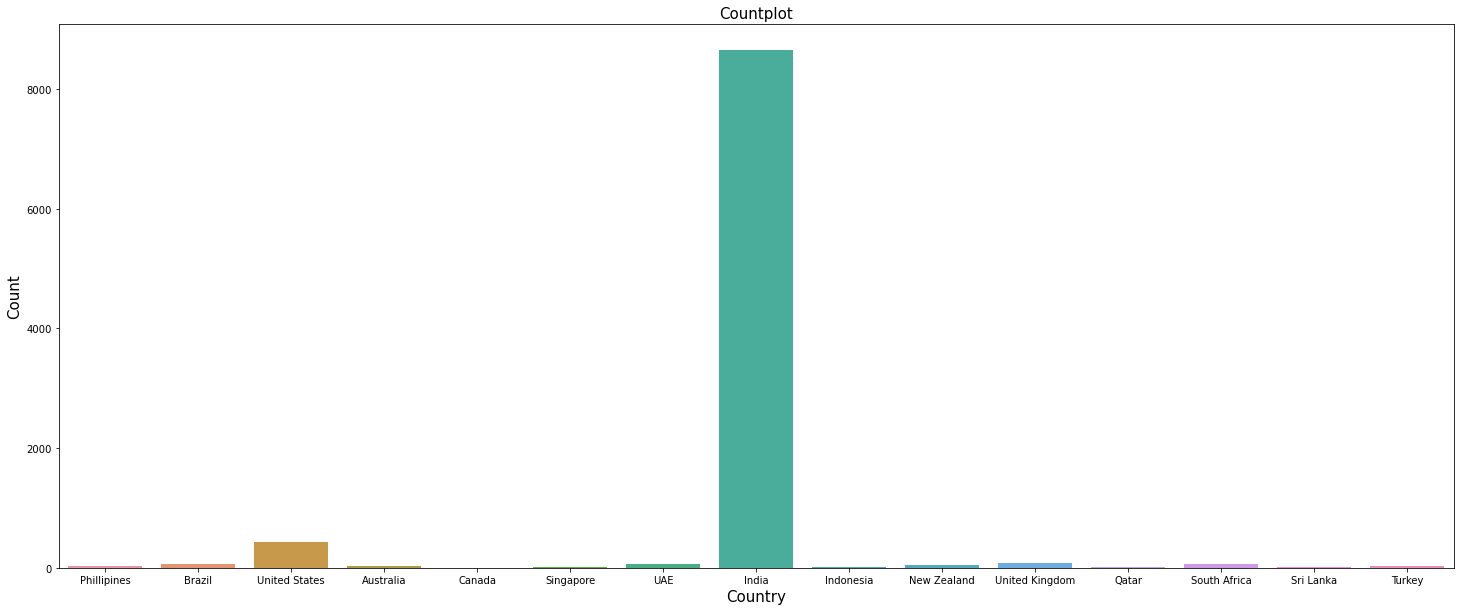

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [33]:
f,ax=plt.subplots(figsize=(25,10))

sns.countplot('Country',data = df)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Country'].value_counts()

# 2. Cuisines

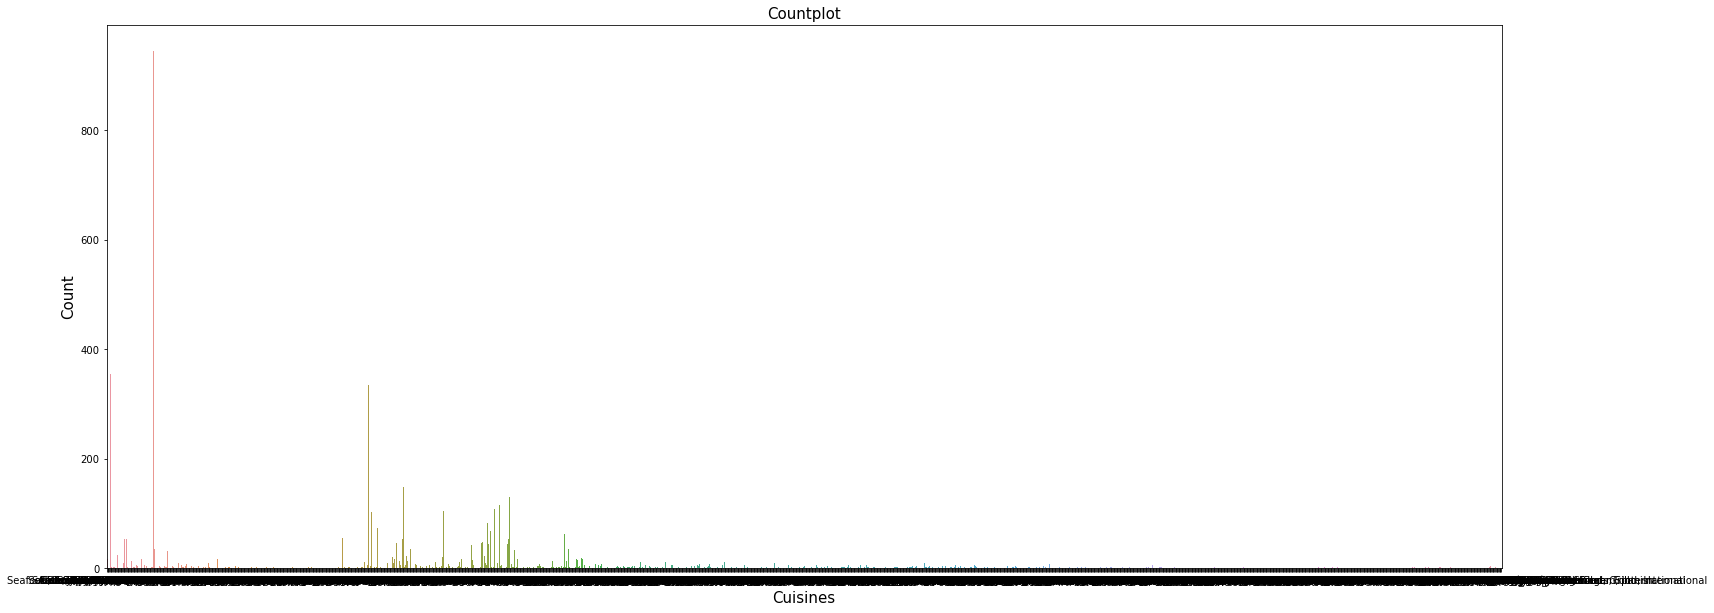

North Indian                                             945
North Indian, Chinese                                    511
Fast Food                                                354
Chinese                                                  354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [34]:
f,ax=plt.subplots(figsize=(25,10))

sns.countplot('Cuisines',data = df)
plt.xlabel('Cuisines', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Cuisines'].value_counts()

# 3. Currency

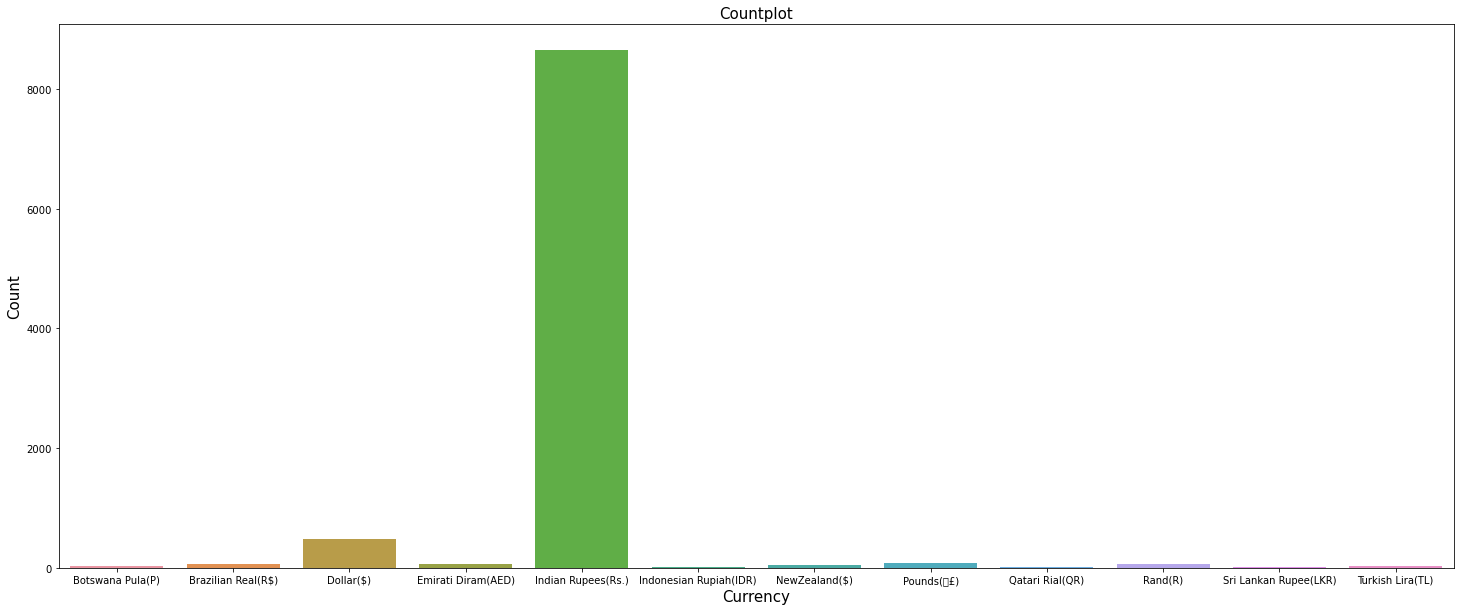

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

In [35]:
f,ax=plt.subplots(figsize=(25,10))

sns.countplot('Currency',data = df)
plt.xlabel('Currency', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Currency'].value_counts()

# 4. Has Table booking

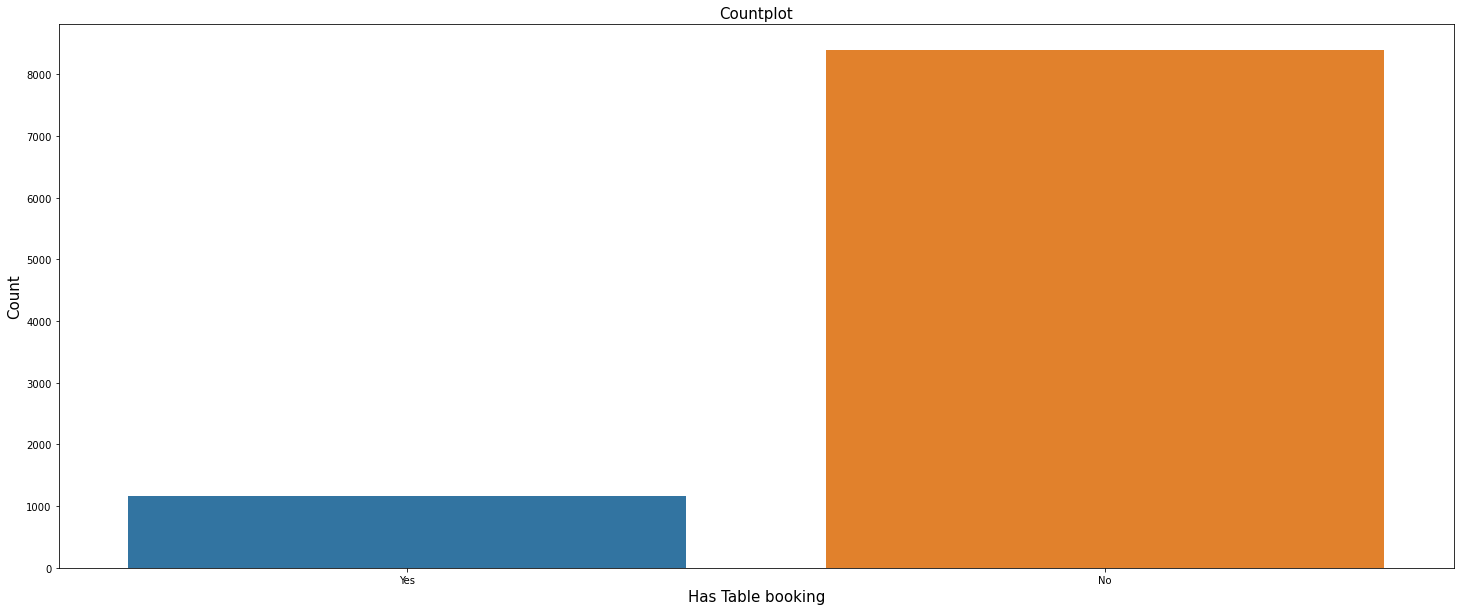

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [36]:
f,ax=plt.subplots(figsize=(25,10))

sns.countplot('Has Table booking',data = df)
plt.xlabel('Has Table booking', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Has Table booking'].value_counts()

# 5. Has Online delivery

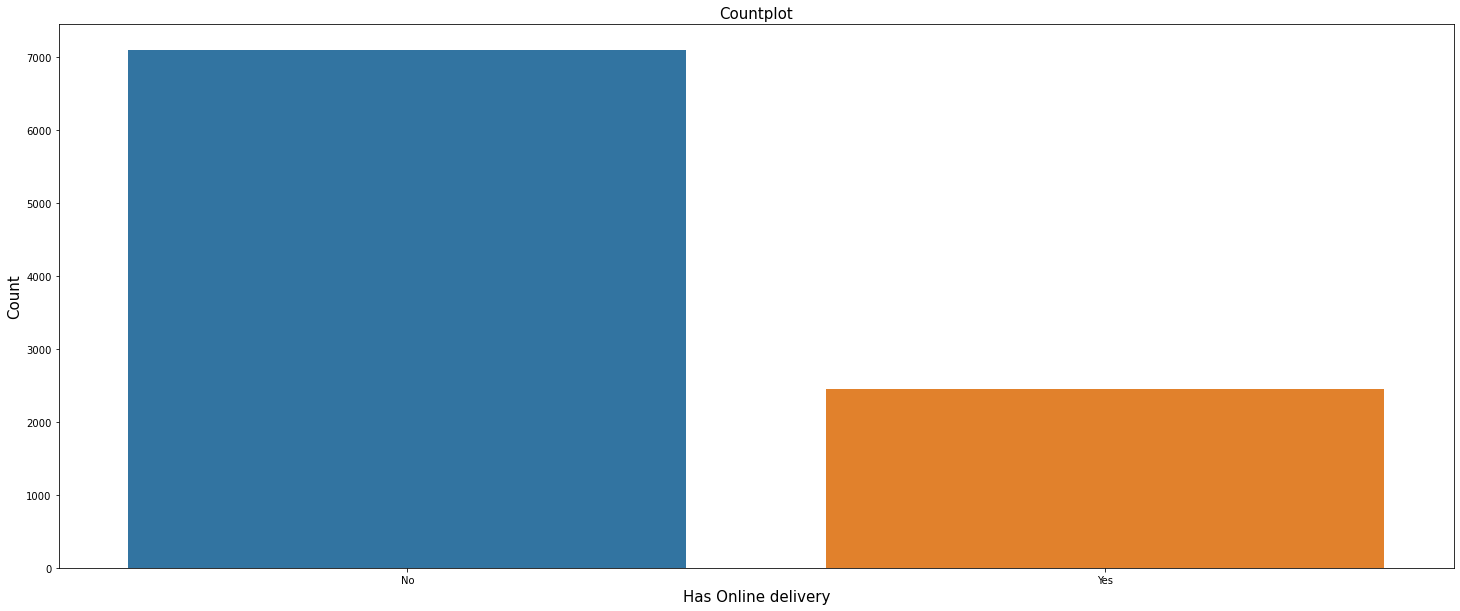

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [37]:
f,ax=plt.subplots(figsize=(25,10))

sns.countplot('Has Online delivery',data = df)
plt.xlabel('Has Online delivery', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Has Online delivery'].value_counts()

# 5. Is delivering now

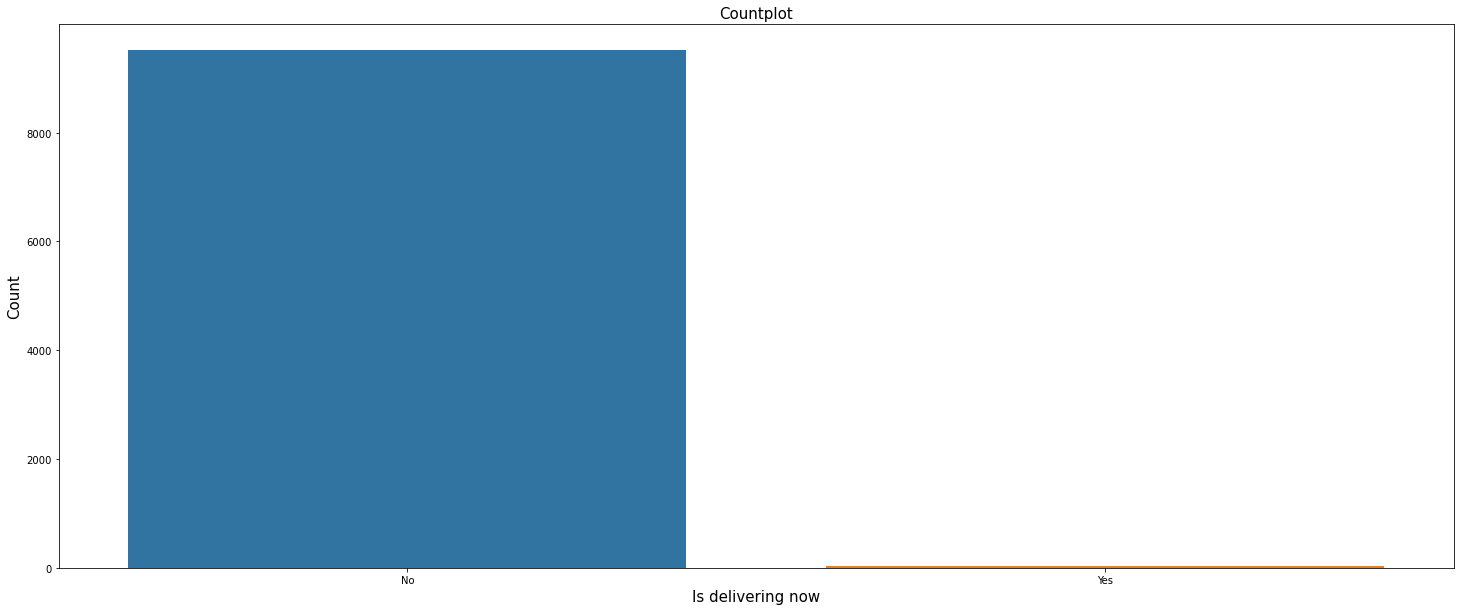

No     9517
Yes      34
Name: Is delivering now, dtype: int64

In [38]:
f,ax=plt.subplots(figsize=(25,10))

sns.countplot('Is delivering now',data = df)
plt.xlabel('Is delivering now', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Is delivering now'].value_counts()

# 6. Switch to order menu

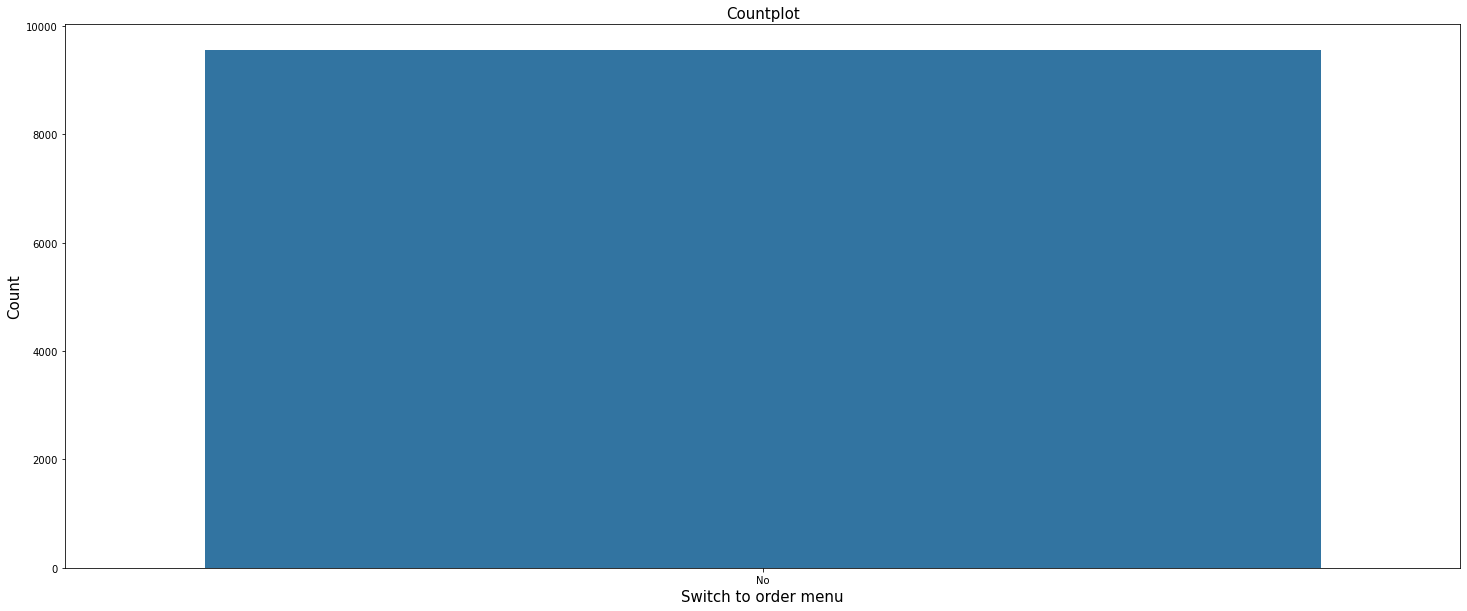

No    9551
Name: Switch to order menu, dtype: int64

In [39]:
f,ax=plt.subplots(figsize=(25,10))

sns.countplot('Switch to order menu',data = df)
plt.xlabel('Switch to order menu', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Switch to order menu'].value_counts()

# 7. Rating color

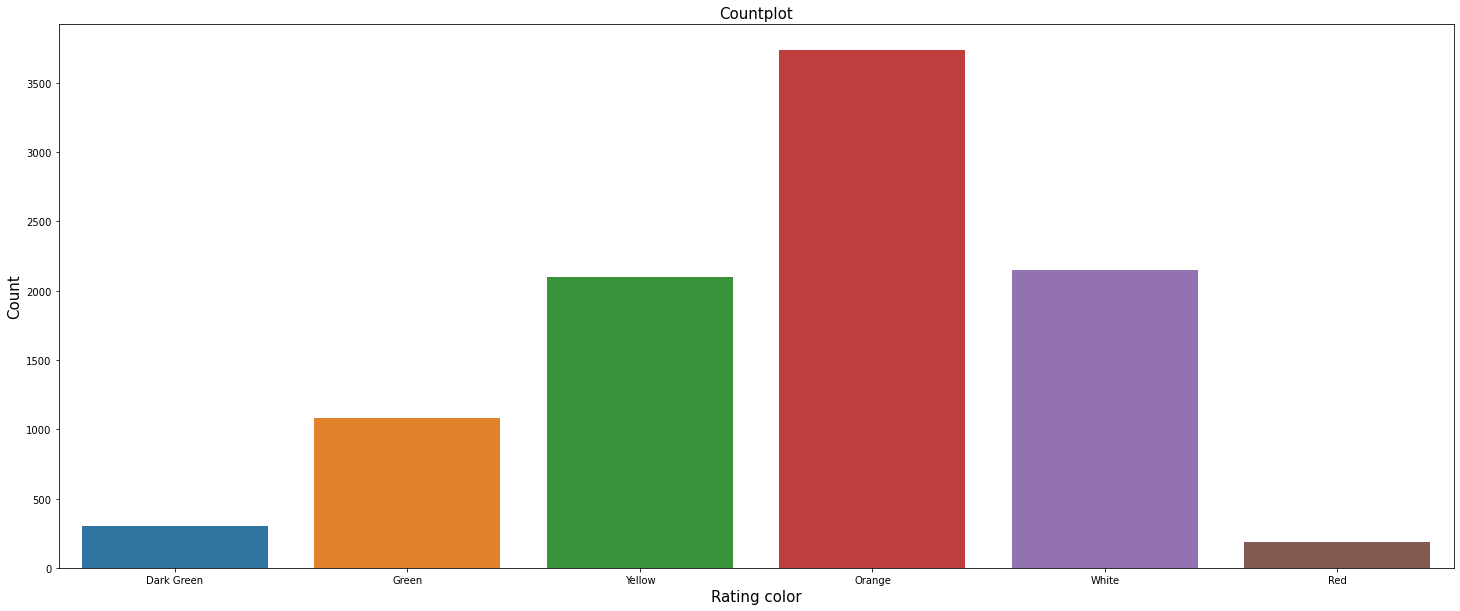

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

In [40]:
f,ax=plt.subplots(figsize=(25,10))

sns.countplot('Rating color',data = df)
plt.xlabel('Rating color', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Rating color'].value_counts()

# 8. Rating text

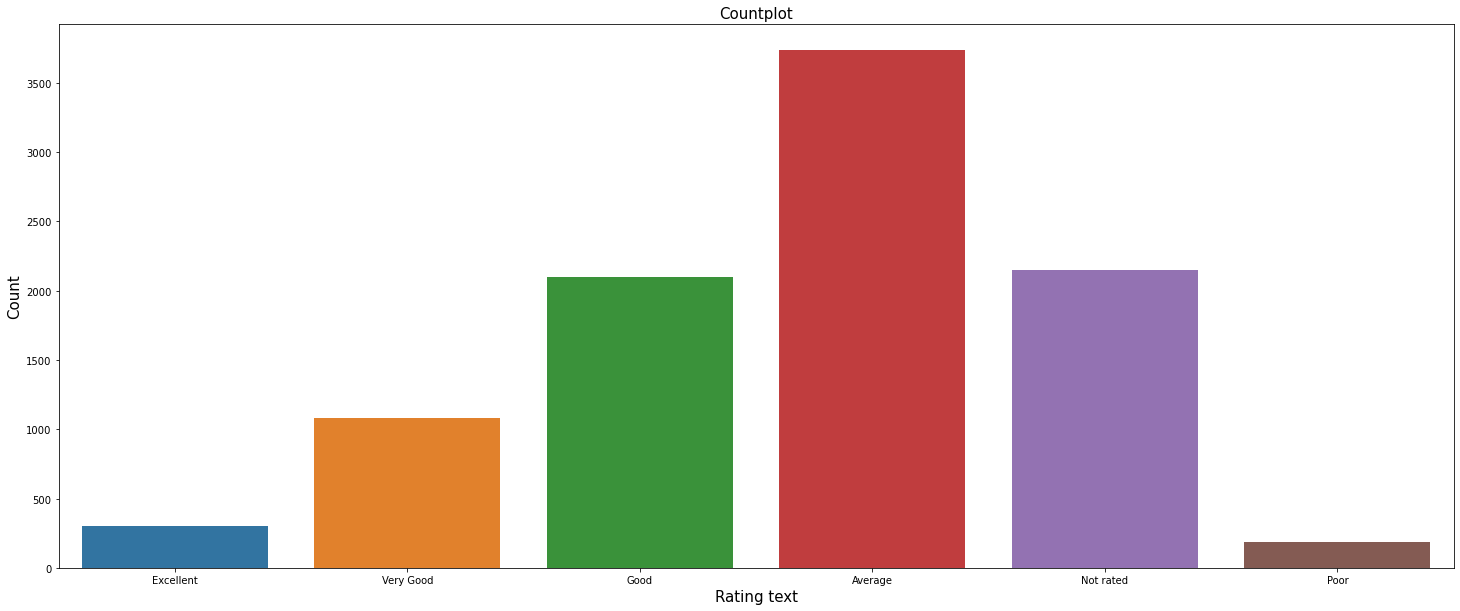

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

In [41]:
f,ax=plt.subplots(figsize=(25,10))

sns.countplot('Rating text',data = df)
plt.xlabel('Rating text', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Rating text'].value_counts()

# Average Cost for two

<AxesSubplot:xlabel='Country', ylabel='Average Cost for two'>

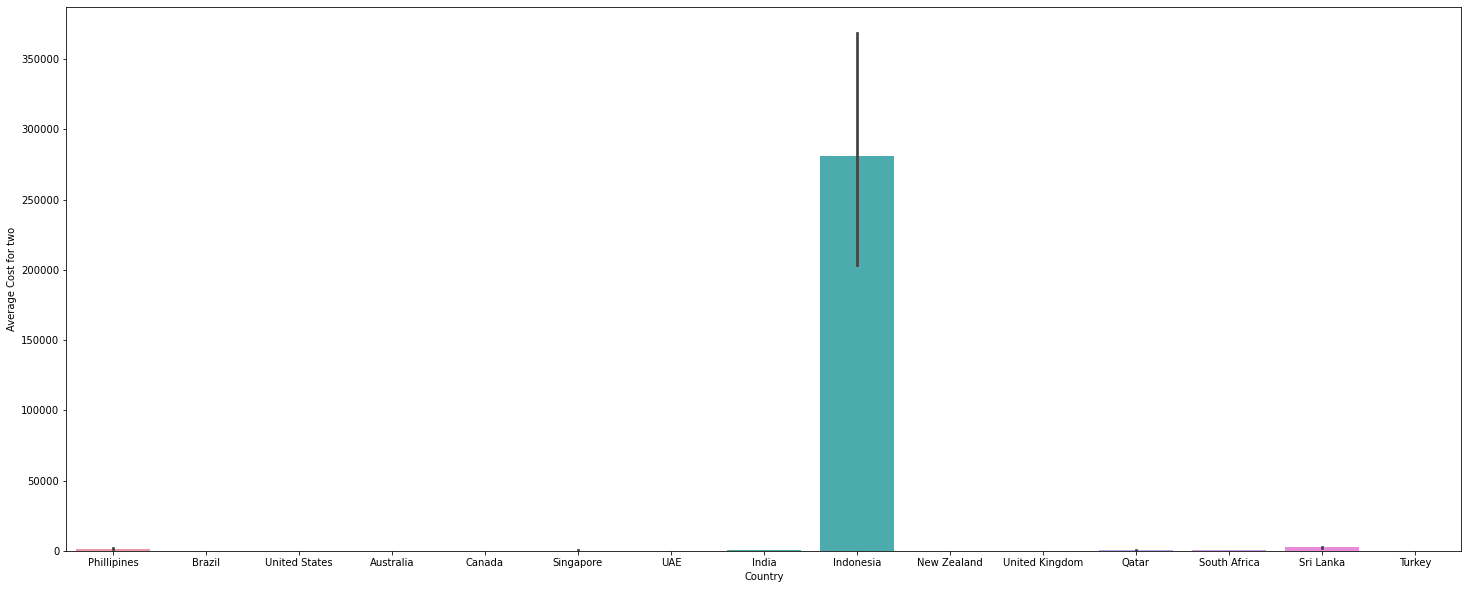

In [42]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Country', y='Average Cost for two', data=df)

<AxesSubplot:xlabel='Currency', ylabel='Average Cost for two'>

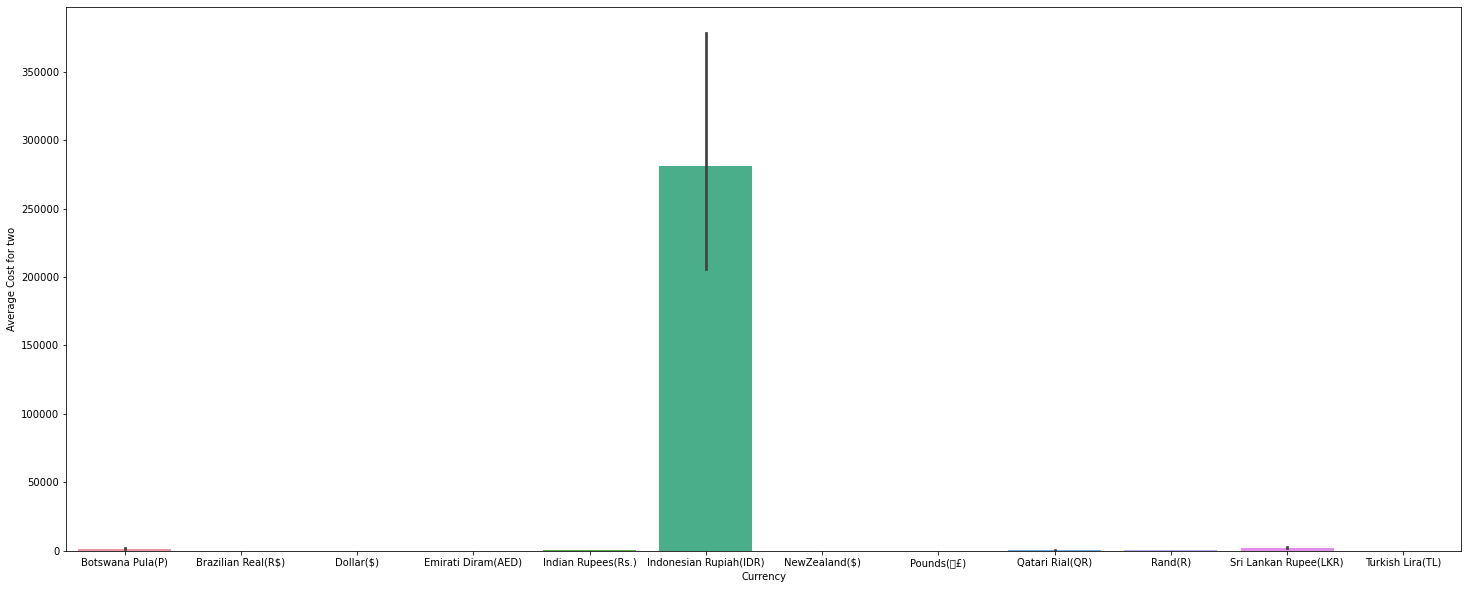

In [43]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Currency', y='Average Cost for two', data=df)

<AxesSubplot:xlabel='Has Table booking', ylabel='Average Cost for two'>

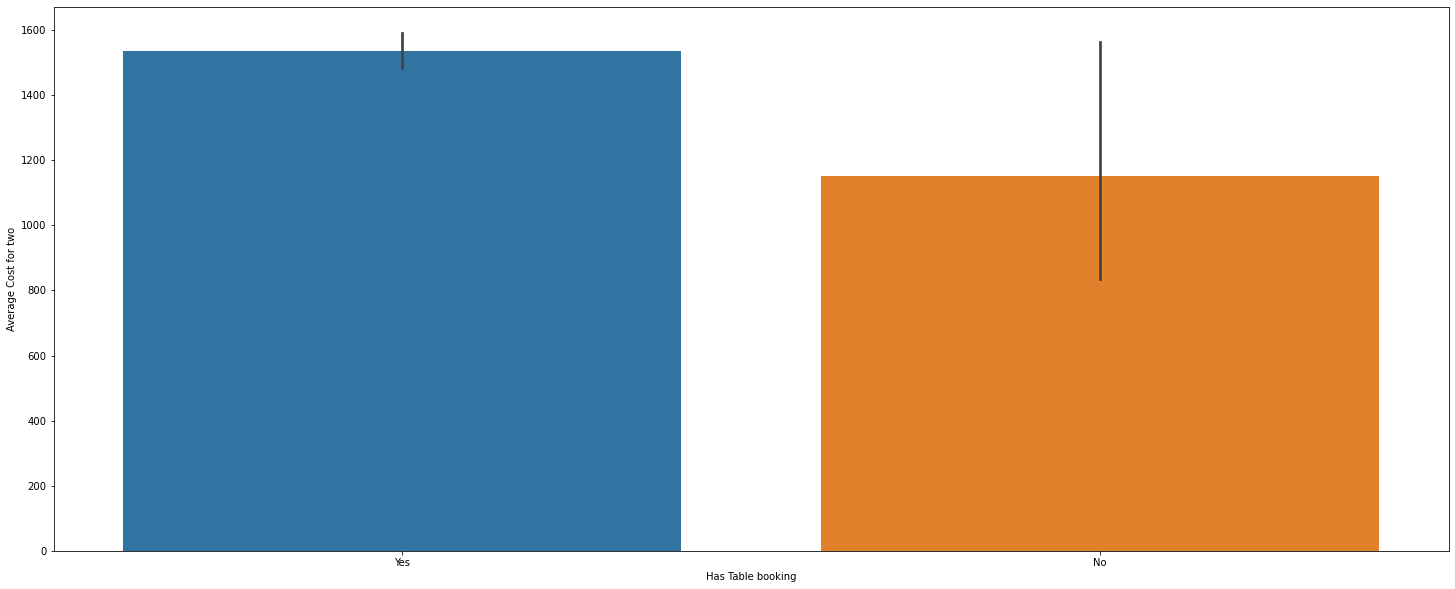

In [44]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Has Table booking', y='Average Cost for two', data=df)

<AxesSubplot:xlabel='Is delivering now', ylabel='Average Cost for two'>

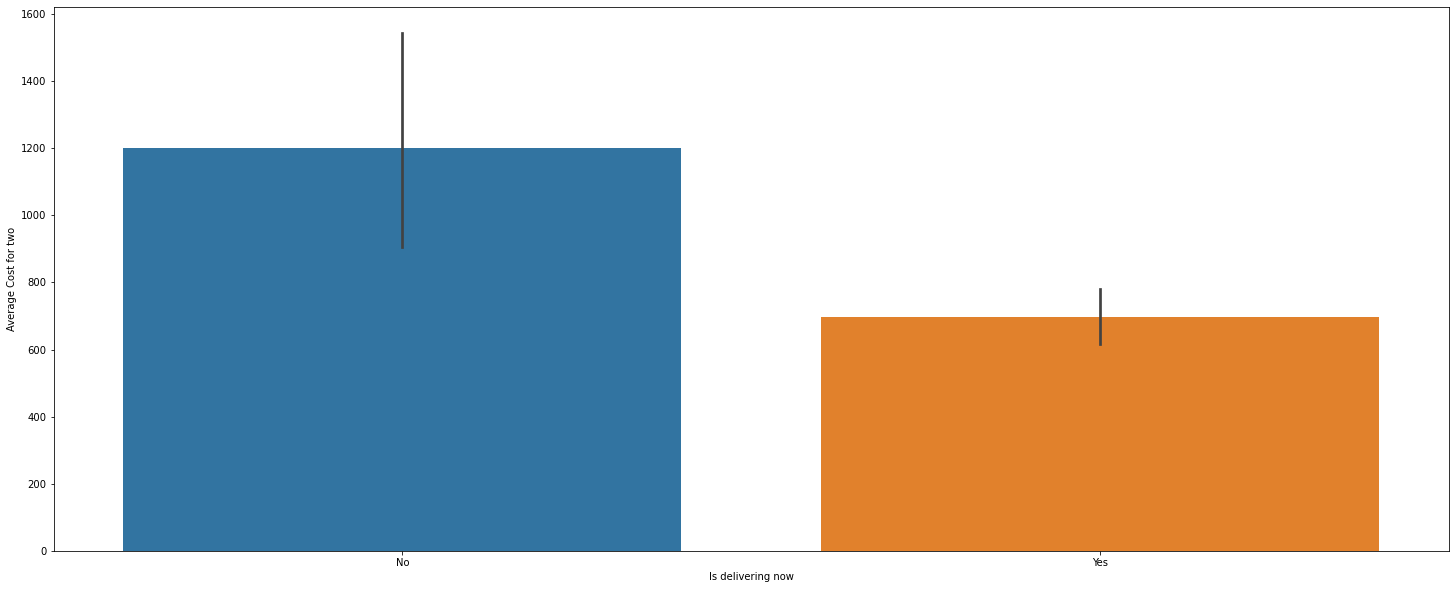

In [45]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Is delivering now', y='Average Cost for two', data=df)

<AxesSubplot:xlabel='Switch to order menu', ylabel='Average Cost for two'>

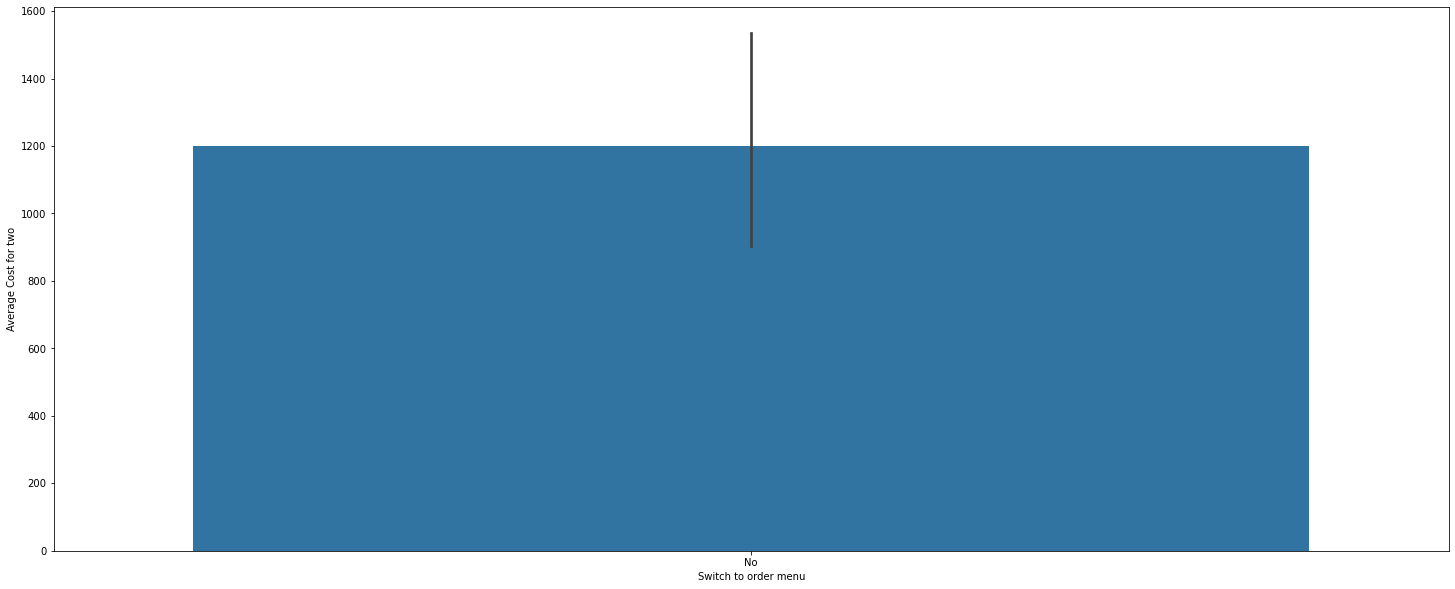

In [46]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Switch to order menu', y='Average Cost for two', data=df)

<AxesSubplot:xlabel='Rating color', ylabel='Average Cost for two'>

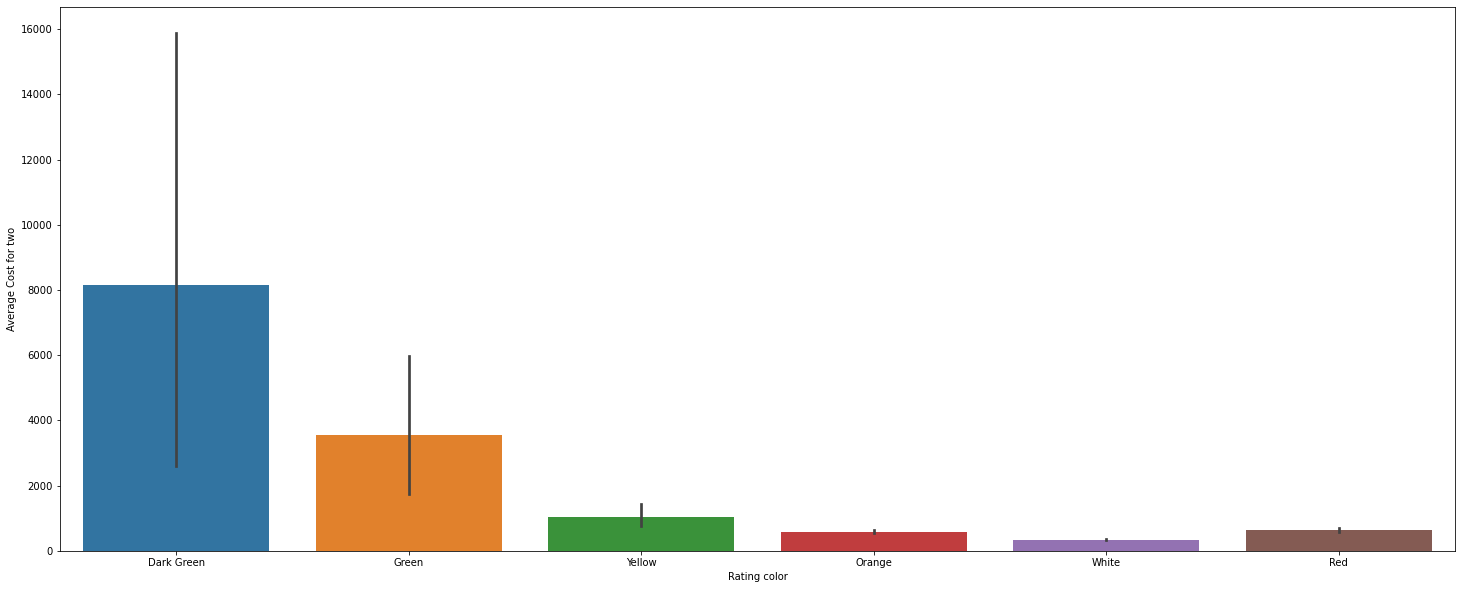

In [47]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Rating color', y='Average Cost for two', data=df)

<AxesSubplot:xlabel='Rating text', ylabel='Average Cost for two'>

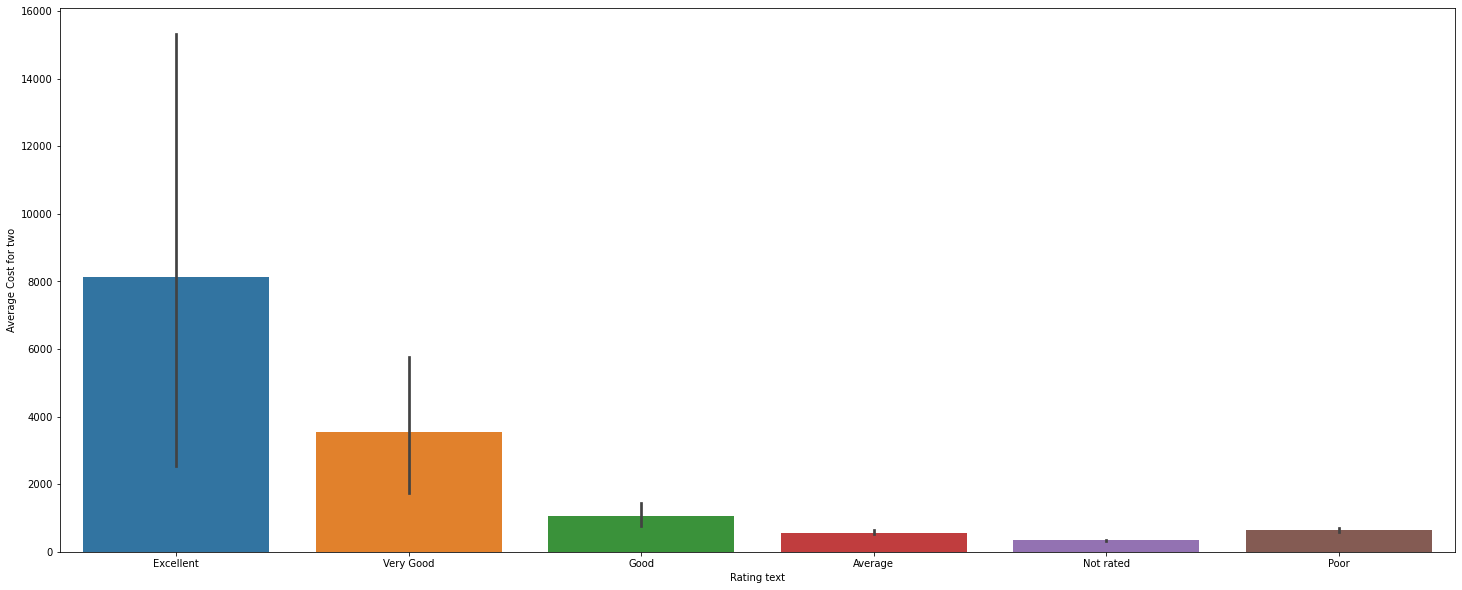

In [48]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Rating text', y='Average Cost for two', data=df)

# Price range

<AxesSubplot:xlabel='Country', ylabel='Price range'>

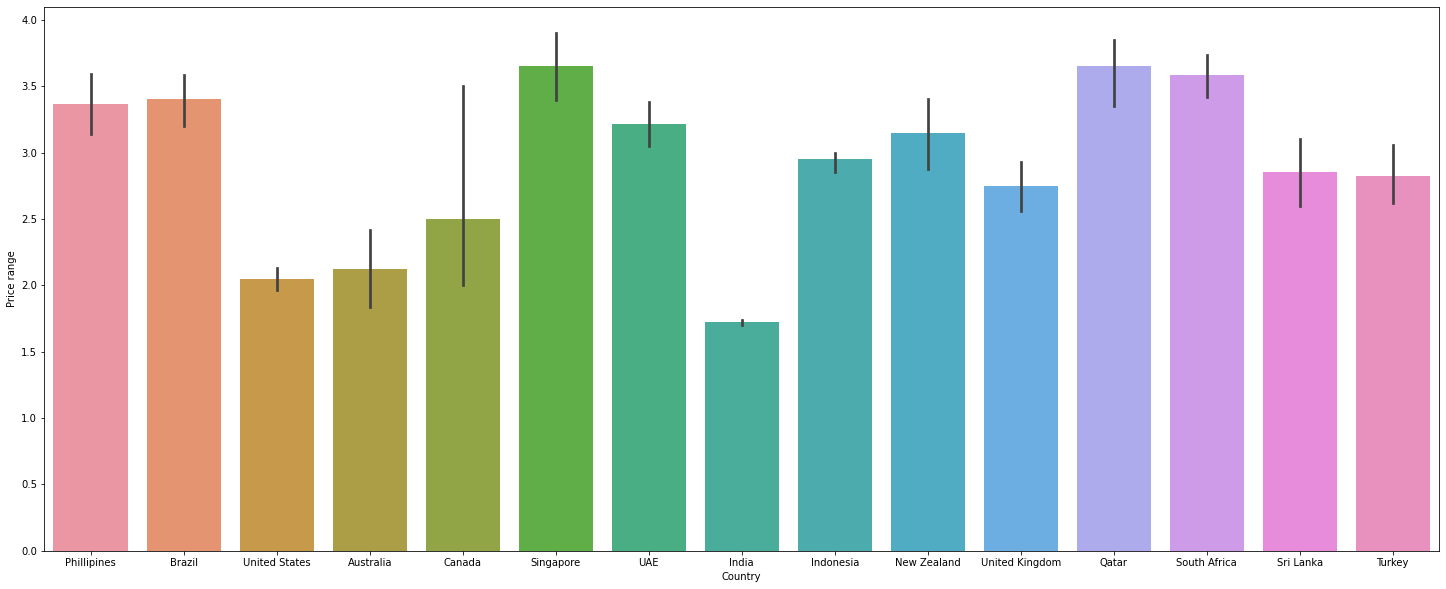

In [49]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Country', y='Price range', data=df)

<AxesSubplot:xlabel='Currency', ylabel='Price range'>

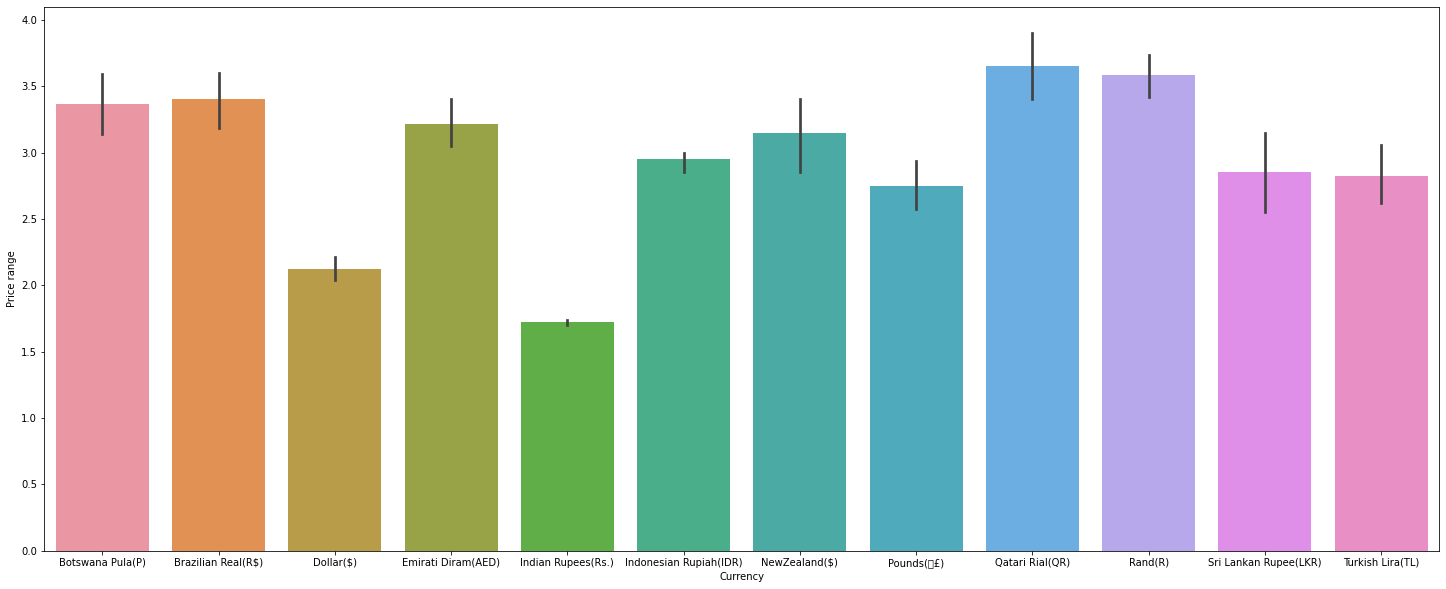

In [50]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Currency', y='Price range', data=df)

<AxesSubplot:xlabel='Has Table booking', ylabel='Price range'>

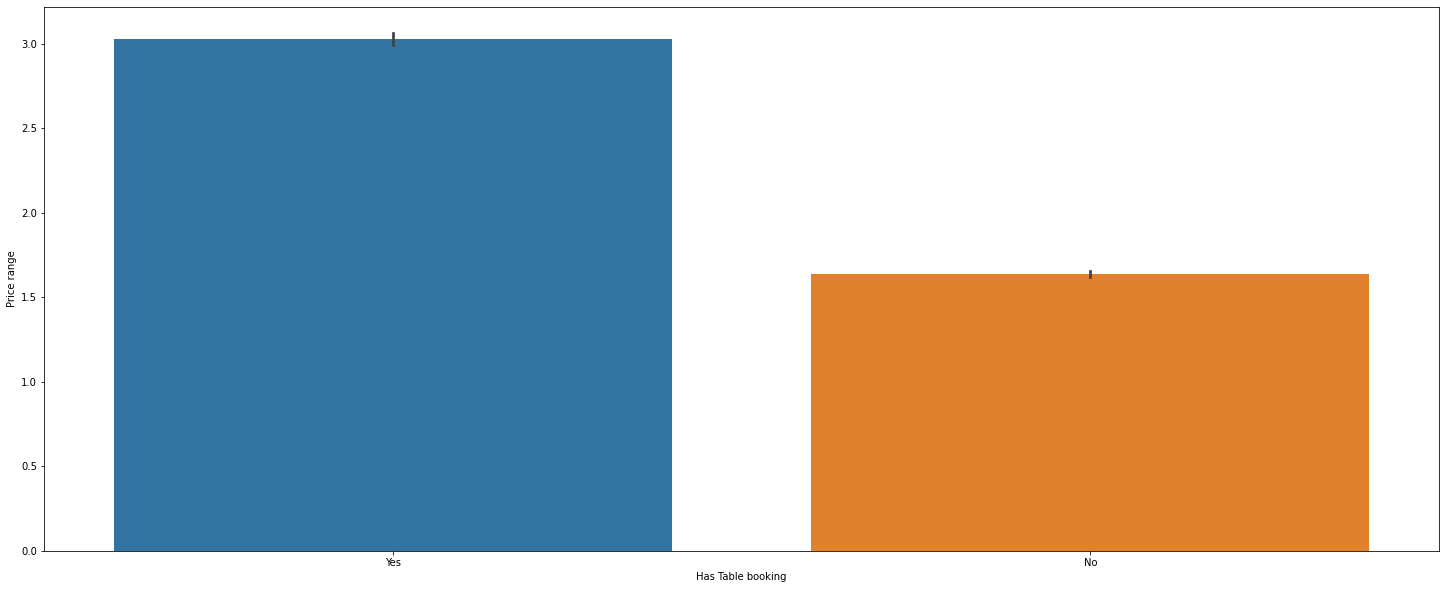

In [51]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Has Table booking', y='Price range', data=df)

<AxesSubplot:xlabel='Is delivering now', ylabel='Average Cost for two'>

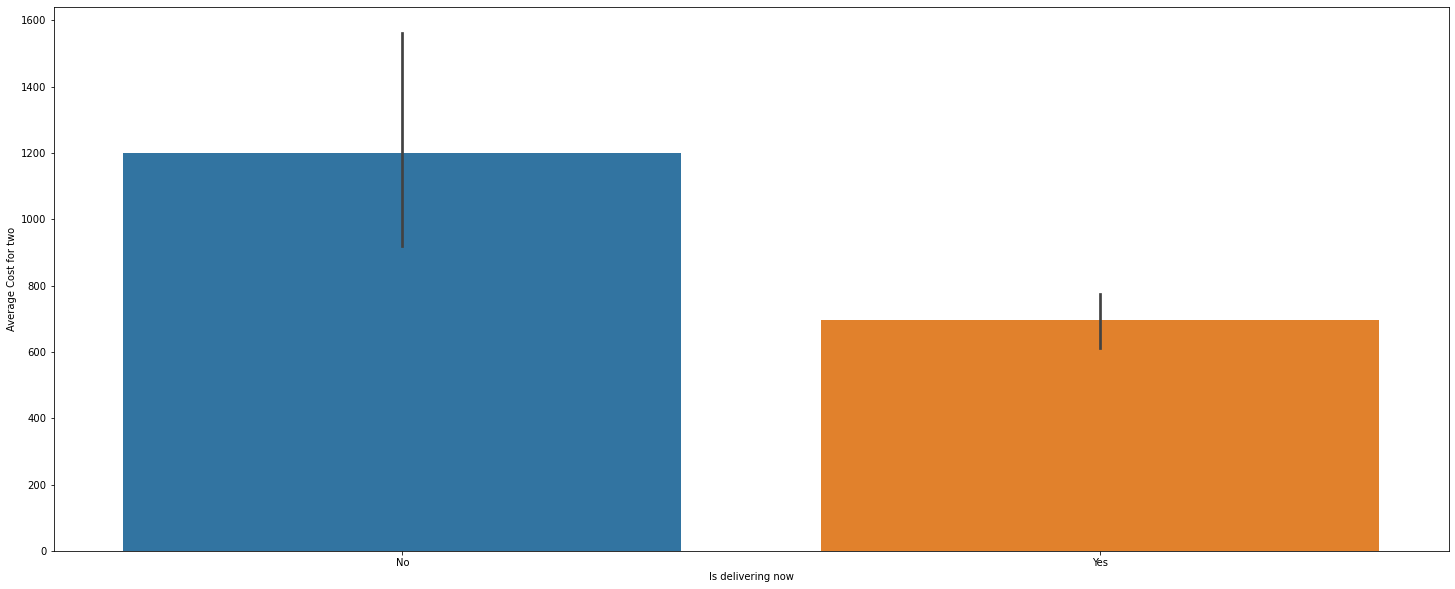

In [52]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Is delivering now', y='Average Cost for two', data=df)

<AxesSubplot:xlabel='Switch to order menu', ylabel='Price range'>

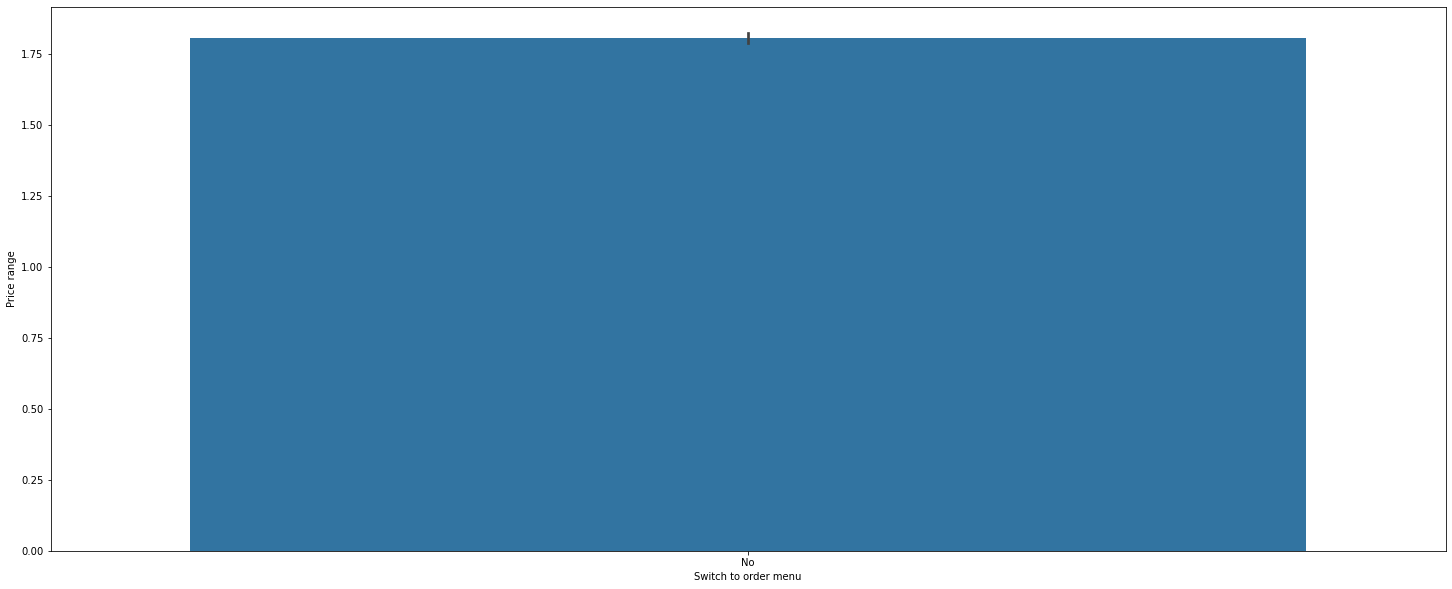

In [53]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Switch to order menu', y='Price range', data=df)

<AxesSubplot:xlabel='Rating color', ylabel='Price range'>

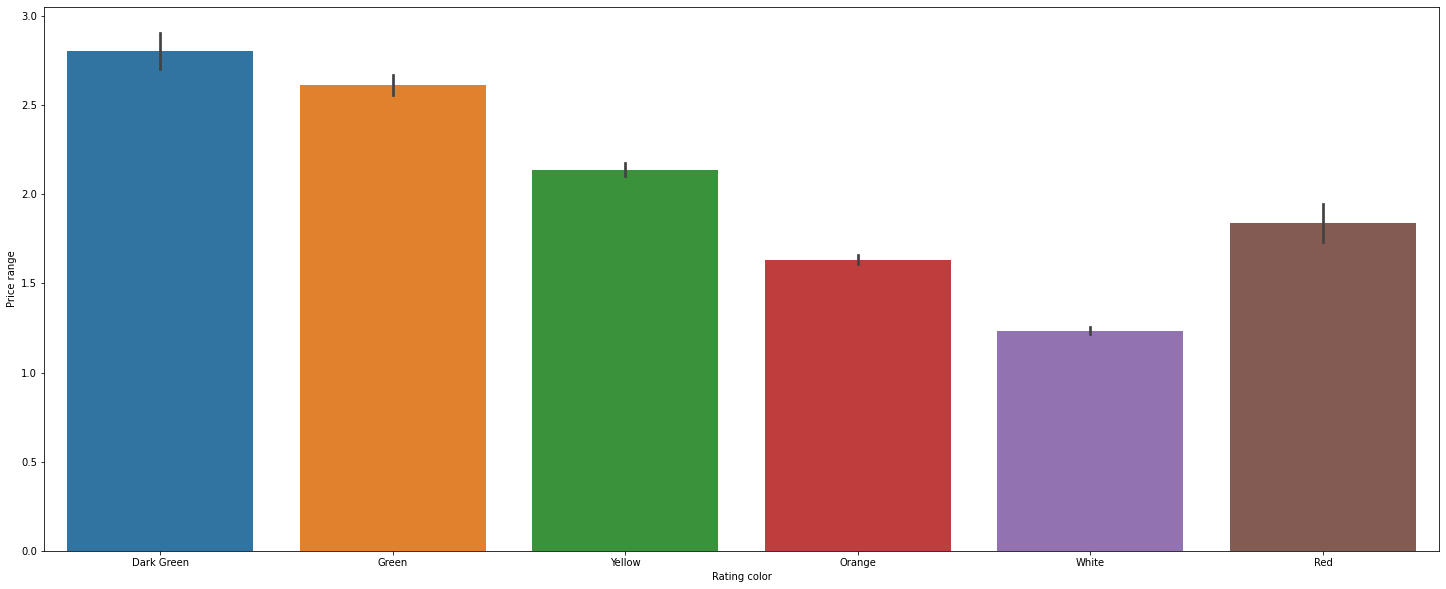

In [54]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Rating color', y='Price range', data=df)

<AxesSubplot:xlabel='Rating text', ylabel='Price range'>

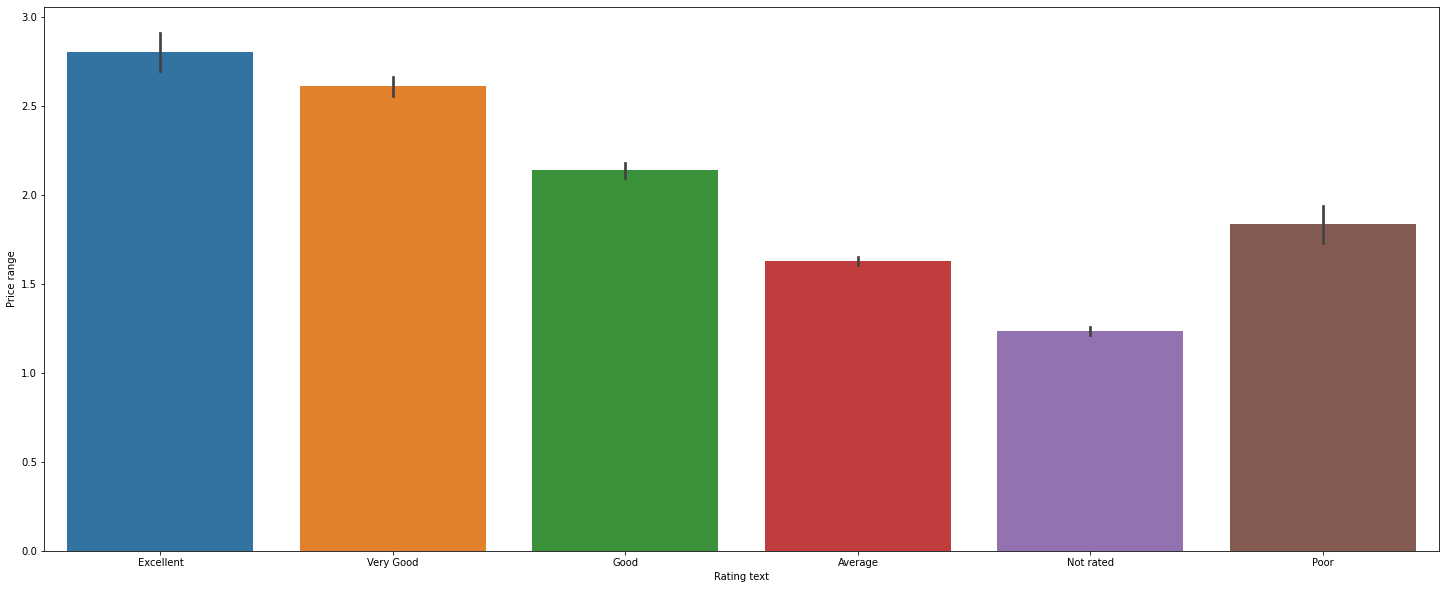

In [55]:
plt.subplots(figsize=(25,10))

sns.barplot(x='Rating text', y='Price range', data=df)

# Numerical features

# Price range

In [56]:
num = ['Country Code', 'Average Cost for two', 'Price range', 'Votes','Longitude', 'Latitude', 'Aggregate rating']

<AxesSubplot:xlabel='Country Code', ylabel='Price range'>

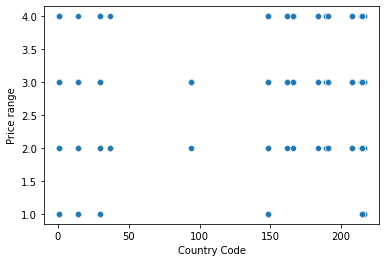

In [57]:
sns.scatterplot(x='Country Code', y='Price range',data=df)

<AxesSubplot:xlabel='Average Cost for two', ylabel='Price range'>

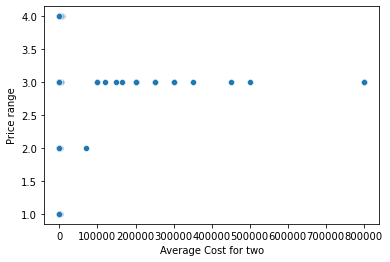

In [58]:
sns.scatterplot(x='Average Cost for two', y='Price range',data=df)

<AxesSubplot:xlabel='Votes', ylabel='Price range'>

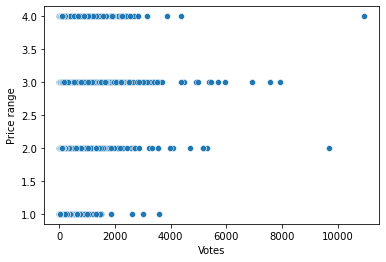

In [59]:
sns.scatterplot(x='Votes', y='Price range',data=df)

<AxesSubplot:xlabel='Longitude', ylabel='Price range'>

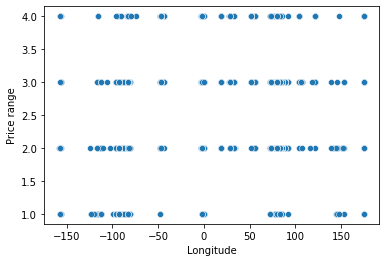

In [60]:
sns.scatterplot(x='Longitude', y='Price range',data=df)

<AxesSubplot:xlabel='Latitude', ylabel='Price range'>

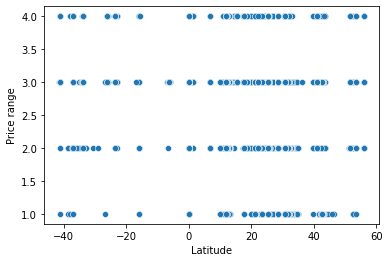

In [61]:
sns.scatterplot(x='Latitude', y='Price range',data=df)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Price range'>

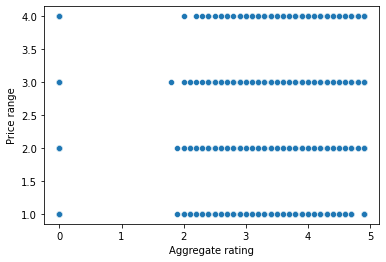

In [62]:
sns.scatterplot(x='Aggregate rating', y='Price range',data=df)

# Average Cost for two

<AxesSubplot:xlabel='Country Code', ylabel='Average Cost for two'>

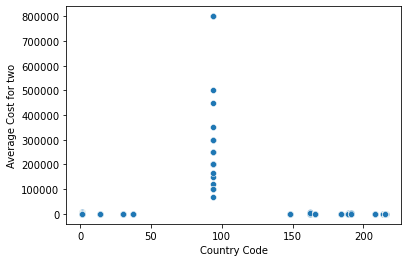

In [63]:
sns.scatterplot(x='Country Code', y='Average Cost for two',data=df)

<AxesSubplot:xlabel='Price range', ylabel='Average Cost for two'>

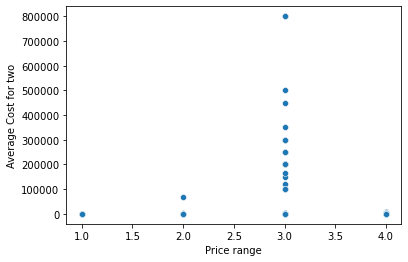

In [64]:
sns.scatterplot(x='Price range', y='Average Cost for two',data=df)

<AxesSubplot:xlabel='Votes', ylabel='Average Cost for two'>

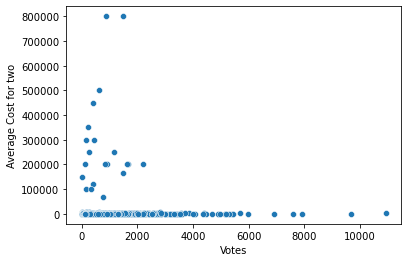

In [65]:
sns.scatterplot(x='Votes', y='Average Cost for two',data=df)

<AxesSubplot:xlabel='Longitude', ylabel='Average Cost for two'>

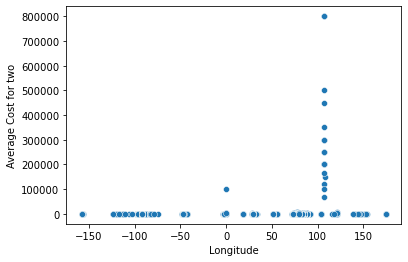

In [66]:
sns.scatterplot(x='Longitude', y='Average Cost for two',data=df)

<AxesSubplot:xlabel='Latitude', ylabel='Average Cost for two'>

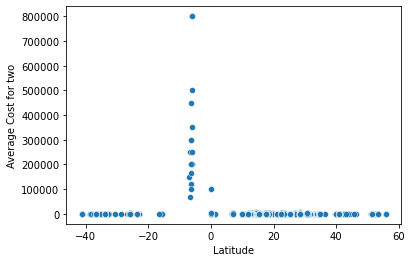

In [67]:
sns.scatterplot(x='Latitude', y='Average Cost for two',data=df)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Average Cost for two'>

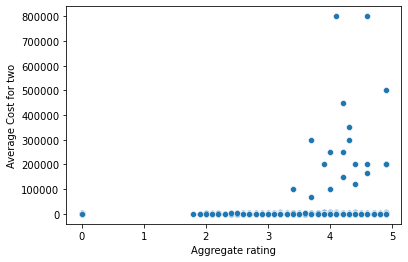

In [68]:
sns.scatterplot(x='Aggregate rating', y='Average Cost for two',data=df)

In [69]:
df.drop(['Country Code','Switch to order menu'], axis =1,inplace=True)

In [70]:
df.head()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# Label Encoder

In [71]:
cat = ['City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']

In [72]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,73,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,73,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,75,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,75,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6
4,75,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229,6


# Outliers Detection

In [73]:
num = ['Average Cost for two', 'Price range', 'Votes','Longitude', 'Latitude', 'Aggregate rating']

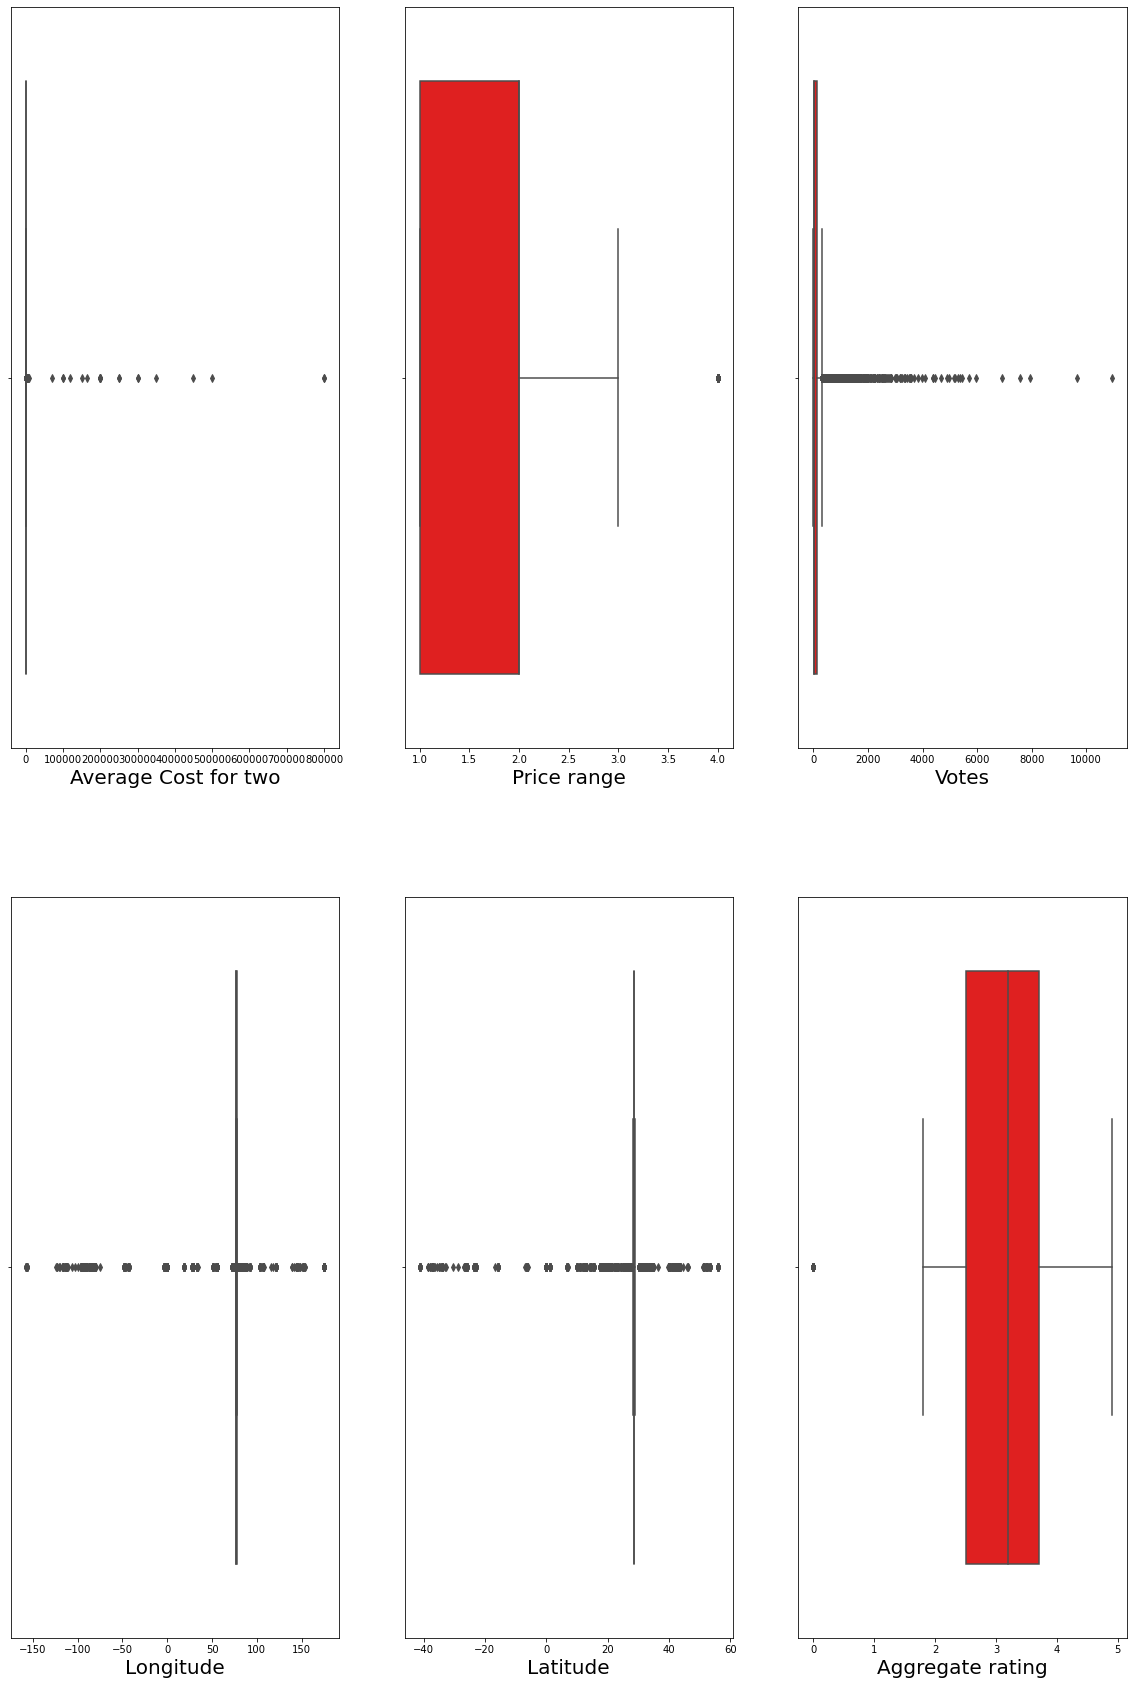

In [74]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

There are outliers present in Votes, Average Cost for two, Longitude, Latitude

# Outliers Removal

In [75]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [76]:
df.shape, df1.shape

((9551, 15), (8408, 15))

# Percent Loss of Data

In [77]:
percent_data_loss = ((9551-8408)/9551)*100
percent_data_loss

11.967333263532614

We lost near about 12% data

# Skewness

In [78]:
df1.skew()

City                    -1.392152
Longitude               -3.702347
Latitude                -3.241005
Cuisines                -0.345840
Average Cost for two     3.716607
Currency               -18.026851
Has Table booking        2.269837
Has Online delivery      1.001452
Is delivering now        0.000000
Price range              1.054225
Aggregate rating        -0.861415
Rating color             0.101035
Rating text              0.422542
Votes                    3.730394
Country                 20.254626
dtype: float64

In [79]:
# here we will consider skewness only for numerical features
skew = ['Longitude','Latitude','Average Cost for two','Currency','Price range','Aggregate rating','Votes']

In [80]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df1[skew] = scaler.fit_transform(df1[skew].values)

# Correlation

In [81]:
df.corr()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
City,1.000000,0.117391,-0.004301,0.026614,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.078406,-0.180959
Longitude,0.117391,1.000000,0.043207,0.126197,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.085101,-0.766221
Latitude,-0.004301,0.043207,1.000000,0.038151,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,-0.022962,0.181299
Cuisines,0.026614,0.126197,0.038151,1.000000,0.005831,0.068912,0.050639,-0.016639,0.007773,-0.005350,-0.080331,-0.016228,-0.079979,-0.032719,-0.127955
Average Cost for two,-0.028838,0.045891,-0.111088,0.005831,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.067783,-0.004034
Currency,-0.071996,0.337334,-0.101864,0.068912,0.045615,1.000000,0.000640,0.006991,0.001458,0.075179,-0.006939,-0.040430,0.014598,-0.027111,-0.105296
Has Table booking,-0.003762,0.100488,0.054658,0.050639,0.007758,0.000640,1.000000,0.101224,-0.016816,0.501925,0.189998,-0.021365,0.044043,0.169422,-0.062076
Has Online delivery,0.012723,0.178757,0.118722,-0.016639,-0.018974,0.006991,0.101224,1.000000,0.101730,0.077918,0.225699,0.011477,-0.080937,0.074303,-0.140464
Is delivering now,-0.014039,0.018787,0.015001,0.007773,-0.001862,0.001458,-0.016816,0.101730,1.000000,0.010940,0.019180,0.001886,-0.031970,-0.001124,-0.016607
Price range,-0.105759,-0.078939,-0.166688,-0.005350,0.075083,0.075179,0.501925,0.077918,0.010940,1.000000,0.437944,-0.140468,0.164242,0.309444,0.178035


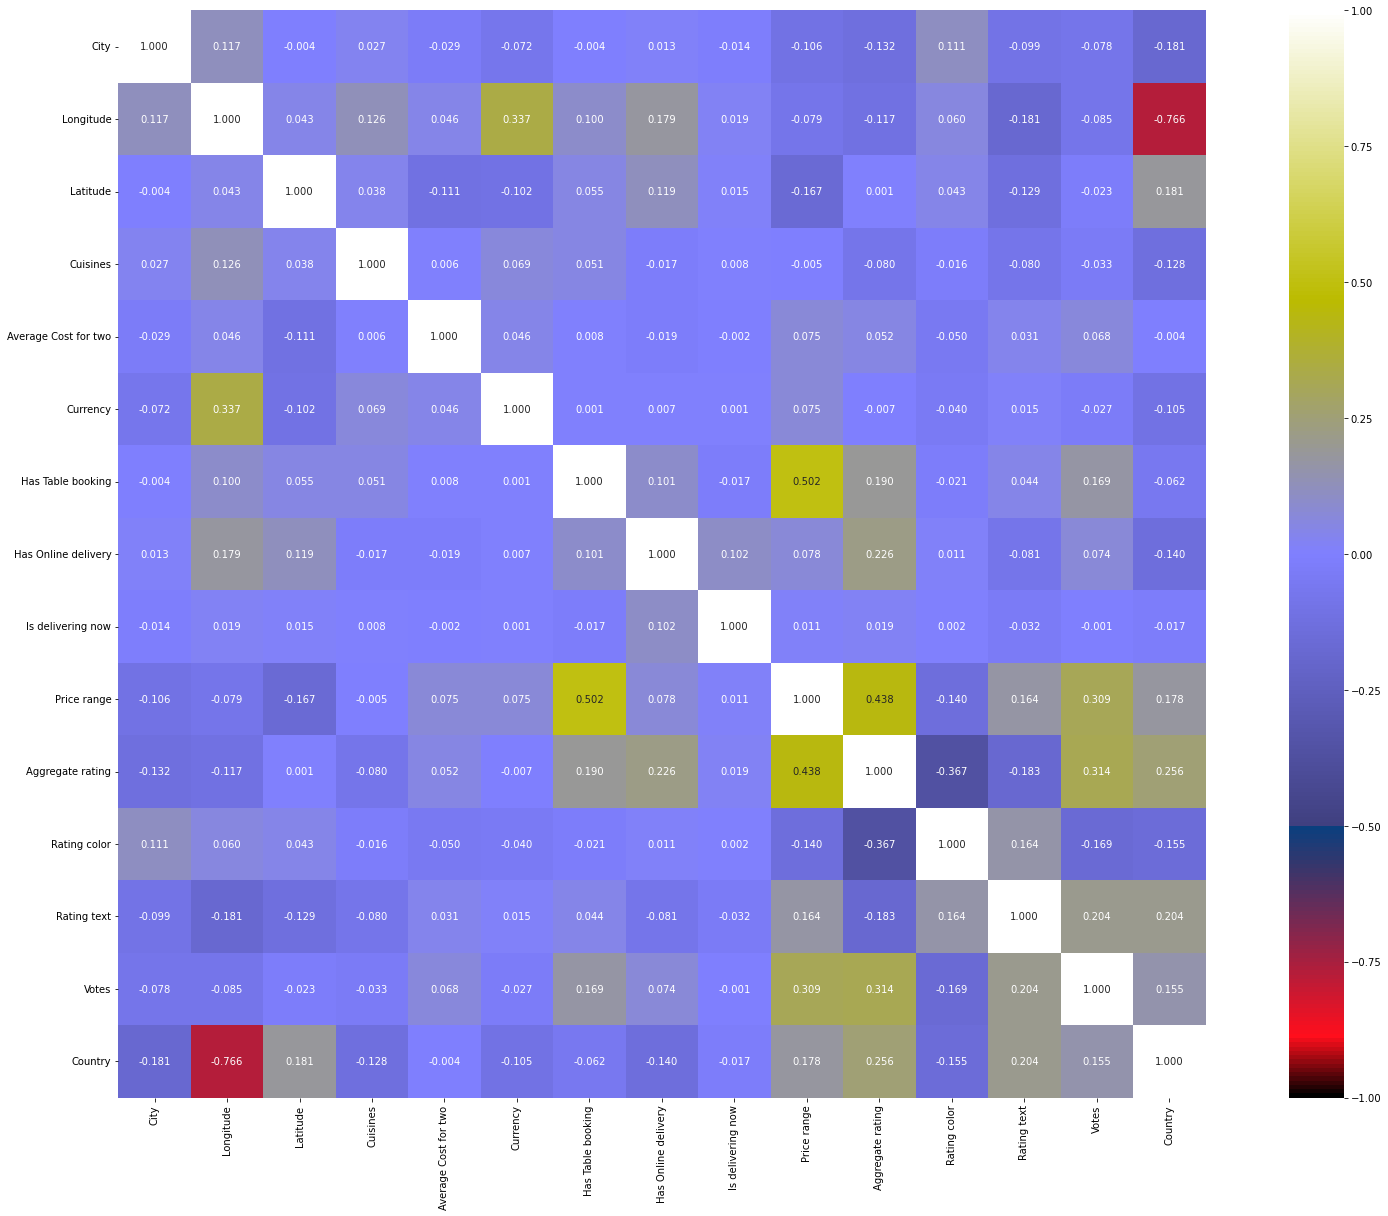

In [82]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

# Check for multicollinearity

From the correlation heatmap we can observe that there is no considerable correlation between features.
Which means that no multicollinearity present.

# Average Cost for two

In [83]:
df1.head()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
544,118,4.715152,-3.222530,515,-0.555203,-15.354727,0,0,0,1.750427,0.587776,2,0,0.262561,8
545,118,4.715029,-3.222530,102,-0.693271,-15.354727,0,0,0,1.750427,1.153580,1,5,0.247371,8
546,118,4.711010,-3.222531,922,0.120524,-15.354727,0,0,0,1.750427,0.959573,5,2,0.247371,8
547,118,4.711286,-3.222531,6,-2.252906,-15.354727,0,0,0,1.750427,0.323424,2,0,0.262561,8
548,118,4.713802,-3.222528,916,-0.080068,-15.354727,0,0,0,1.750427,0.959573,5,2,0.277328,8


# Split dataset into feature & target variables

In [84]:
# Splitting data in target and dependent feature
X = df1.drop(['Average Cost for two'], axis =1)
Y = df1['Average Cost for two']

In [85]:
X

,City,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
544,118,4.715152,-3.222530,515,-15.354727,0,0,0,1.750427,0.587776,2,0,0.262561,8
545,118,4.715029,-3.222530,102,-15.354727,0,0,0,1.750427,1.153580,1,5,0.247371,8
546,118,4.711010,-3.222531,922,-15.354727,0,0,0,1.750427,0.959573,5,2,0.247371,8
547,118,4.711286,-3.222531,6,-15.354727,0,0,0,1.750427,0.323424,2,0,0.262561,8
548,118,4.713802,-3.222528,916,-15.354727,0,0,0,1.750427,0.959573,5,2,0.277328,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,134,-3.687255,-3.222640,465,0.029377,0,0,0,0.726470,0.864583,5,2,0.735749,3
9273,134,1.045921,-2.663199,322,0.029377,0,0,0,0.726470,1.454524,1,5,1.106437,3
9274,134,1.049107,-2.663001,88,0.029377,0,0,0,1.750427,0.959573,5,2,0.663453,3
9275,134,1.045871,-2.663008,1031,0.029377,0,0,0,1.403141,1.557455,1,5,1.429618,3


In [86]:
Y

544    -0.555203
545    -0.693271
546     0.120524
547    -2.252906
548    -0.080068
          ...   
9272   -0.175934
9273    0.364207
9274    1.608548
9275    1.513716
9312   -2.836694
Name: Average Cost for two, Length: 8408, dtype: float64

# Feature Scaling

In [129]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

# Model Building

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 99)
from sklearn.model_selection import cross_val_score

In [131]:
X_train.shape,X_test.shape

((5885, 14), (2523, 14))

# Find best random state

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, random_state=i, test_size=.33)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    y_pred_lr=lr.predict(X_test)
    R2=r2_score(Y_test,y_pred_lr)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.7492588087932561 on Random_state 295


Here we got best random state value 926. We will use this for further model building

# Linear Regression

In [133]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, random_state=295, test_size=.33)
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)
y_pred_lr=lr.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_lr))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_lr)))
print('R2_Score :' ,r2_score(Y_test,y_pred_lr))
print('CV_Score_lr : ',cross_val_score(lr, X, Y, cv =5).mean())

Mean absolute error : 0.42996632045574434
Mean squared error : 0.2552876658607971
Root Mean Squared Error: 0.505259998278903
R2_Score : 0.7492588087932561
CV_Score_lr :  -1.0205789582381167e+24


# RandomForestRegressor

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=926, test_size=.33)
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_rf))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_rf)))
print('R2_Score :' ,r2_score(Y_test,y_pred_rf))
print('CV_Score_rf : ',cross_val_score(rf, X, Y, cv =5).mean())

Mean absolute error : 0.01243130654228462
Mean squared error : 0.006218940589704445
Root Mean Squared Error: 0.07886025988864381
R2_Score : 0.9938363933319116
CV_Score_rf :  0.9363339423546435


# DecisionTreeRegressor

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=926, test_size=.33)
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_dt))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_dt)))
print('R2_Score :' ,r2_score(Y_test,y_pred_dt))
print('CV_Score_dt : ',cross_val_score(dt, X, Y, cv =5).mean())

Mean absolute error : 0.009361512097165852
Mean squared error : 0.0109638013791736
Root Mean Squared Error: 0.10470817245646874
R2_Score : 0.9891337506262489
CV_Score_dt :  0.8964555828111292


# KNeighborsRegressor

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=926, test_size=.33)
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
knn.score(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_knn))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_knn)))
print('R2_Score :' ,r2_score(Y_test,y_pred_knn))
print('CV_Score_knn : ',cross_val_score(knn, X, Y, cv =5).mean())

Mean absolute error : 0.1432449330990101
Mean squared error : 0.0986551245660657
Root Mean Squared Error: 0.31409413328820024
R2_Score : 0.9022226736458673
CV_Score_knn :  0.8967644604762333


#   GradientBoostingRegressor


In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=926, test_size=.33)
gb=GradientBoostingRegressor()
gb.fit(X_train,Y_train)
gb.score(X_train,Y_train)
y_pred_gb=gb.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_gb))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_gb))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_gb)))
print('R2_Score :' ,r2_score(Y_test,y_pred_gb))
print('CV_Score_gb : ',cross_val_score(gb, X, Y, cv =5).mean())

Mean absolute error : 0.028057234202062856
Mean squared error : 0.011672021258183918
Root Mean Squared Error: 0.10803712907229587
R2_Score : 0.9884318322358453
CV_Score_gb :  0.9513165716138332


# AdaBoostRegressor

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=926, test_size=.33)
ab=AdaBoostRegressor()
ab.fit(X_train,Y_train)
ab.score(X_train,Y_train)
y_pred_ab=ab.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_ab))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_ab))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_ab)))
print('R2_Score :' ,r2_score(Y_test,y_pred_ab))
print('CV_Score_ab : ',cross_val_score(ab, X, Y, cv =5).mean())

Mean absolute error : 6.681582214434195e-15
Mean squared error : 8.318849170461907e-29
Root Mean Squared Error: 9.120772538804981e-15
R2_Score : 1.0
CV_Score_ab :  0.967818894536159


Among all the models the RandomForestRegressor model gives us better R2_score with minimun value of Root Mean Squared Error.
We will select this model as final model.

# Hyperparameter Tuning

In [139]:
from sklearn.model_selection import GridSearchCV

In [178]:
n_estimators = [2,5,7,9,15]
criterion_list = ['gini','entropy']
max_features = ["auto",'log']
max_depth = [1,4]
min_samples_split = [1,5]
min_samples_leaf = [2,6]
bootstrap = ['true','false']

In [179]:
param_grid ={'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap}

In [180]:
clf = GridSearchCV(rf,param_grid = param_grid,cv = 10,verbose = True,n_jobs = -1)

In [181]:
best_clf = clf.fit(X,Y)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


In [182]:
best_clf.best_estimator_

RandomForestRegressor(bootstrap='true', max_depth=4, max_features='auto',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=7)

In [183]:
param_score_rf = round(best_clf.score(X,Y),3)
param_score_rf

0.989

# Model Saving

In [185]:
import pickle

In [186]:
filename = "ZomatoProject"
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [187]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,Y_test)
print(result*100)

-74.53210753782635


In [188]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],y_pred_rf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774
Predicted,-0.950408,-0.950408,-0.950408,-0.950408,-0.111969,-0.950408,-0.950408,-0.950408,-0.950408,0.397861,...,0.290482,-0.682108,-0.950408,-0.950408,0.59232,-0.950408,-0.950408,-0.950408,-0.950408,-0.950408
Original,-0.950408,0.726470,1.503854,-0.950408,1.483017,-0.950408,1.403141,-0.950408,0.726470,1.566366,...,1.469126,1.406614,-0.950408,-0.950408,0.59232,-0.950408,-0.950408,-0.950408,-0.950408,-0.950408


# Price range

In [160]:
df1.head()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
544,118,4.715152,-3.222530,515,-0.555203,-15.354727,0,0,0,1.750427,0.587776,2,0,0.262561,8
545,118,4.715029,-3.222530,102,-0.693271,-15.354727,0,0,0,1.750427,1.153580,1,5,0.247371,8
546,118,4.711010,-3.222531,922,0.120524,-15.354727,0,0,0,1.750427,0.959573,5,2,0.247371,8
547,118,4.711286,-3.222531,6,-2.252906,-15.354727,0,0,0,1.750427,0.323424,2,0,0.262561,8
548,118,4.713802,-3.222528,916,-0.080068,-15.354727,0,0,0,1.750427,0.959573,5,2,0.277328,8


# Split dataset into feature & target variables

In [161]:
# Splitting data in target and dependent feature
X = df1.drop(['Price range'], axis =1)
Y = df1['Price range']

# Feature Scaling

In [162]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

# Model Building

In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 99)
from sklearn.model_selection import cross_val_score


In [165]:
X_train.shape,X_test.shape

((5885, 14), (2523, 14))

# Find best random state

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, random_state=i, test_size=.33)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    y_pred_lr=lr.predict(X_test)
    R2=r2_score(Y_test,y_pred_lr)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.7492588087932561 on Random_state 295


Here we got best random state value 926. We will use this for further model building

# Linear Regression

In [167]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, random_state=295, test_size=.33)
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)
y_pred_lr=lr.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_lr))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_lr)))
print('R2_Score :' ,r2_score(Y_test,y_pred_lr))
print('CV_Score_lr : ',cross_val_score(lr, X, Y, cv =5).mean())

Mean absolute error : 0.42996632045574434
Mean squared error : 0.2552876658607971
Root Mean Squared Error: 0.505259998278903
R2_Score : 0.7492588087932561
CV_Score_lr :  -1.0205789582381167e+24


# RandomForestRegressor

In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=926, test_size=.33)
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_rf))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_rf)))
print('R2_Score :' ,r2_score(Y_test,y_pred_rf))
print('CV_Score_rf : ',cross_val_score(rf, X, Y, cv =5).mean())

Mean absolute error : 0.012231179497622114
Mean squared error : 0.006214326170589081
Root Mean Squared Error: 0.07883099752374748
R2_Score : 0.9938409666935668
CV_Score_rf :  0.942082486893999


# DecisionTreeRegressor

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=926, test_size=.33)
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_dt))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_dt)))
print('R2_Score :' ,r2_score(Y_test,y_pred_dt))
print('CV_Score_dt : ',cross_val_score(dt, X, Y, cv =5).mean())

Mean absolute error : 0.008640642385798971
Mean squared error : 0.009267198675594427
Root Mean Squared Error: 0.09626629044268002
R2_Score : 0.9908152575623643
CV_Score_dt :  0.9578482505838324


# KNeighborsRegressor

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=926, test_size=.33)
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
knn.score(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_knn))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_knn)))
print('R2_Score :' ,r2_score(Y_test,y_pred_knn))
print('CV_Score_knn : ',cross_val_score(knn, X, Y, cv =5).mean())

Mean absolute error : 0.1432449330990101
Mean squared error : 0.0986551245660657
Root Mean Squared Error: 0.31409413328820024
R2_Score : 0.9022226736458673
CV_Score_knn :  0.8967644604762333


#   GradientBoostingRegressor


In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=926, test_size=.33)
gb=GradientBoostingRegressor()
gb.fit(X_train,Y_train)
gb.score(X_train,Y_train)
y_pred_gb=gb.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_gb))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_gb))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_gb)))
print('R2_Score :' ,r2_score(Y_test,y_pred_gb))
print('CV_Score_gb : ',cross_val_score(gb, X, Y, cv =5).mean())

Mean absolute error : 0.028103548123218063
Mean squared error : 0.011835815005307093
Root Mean Squared Error: 0.10879253193720188
R2_Score : 0.9882694958672312
CV_Score_gb :  0.9518672076368663


# AdaBoostRegressor

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=926, test_size=.33)
ab=AdaBoostRegressor()
ab.fit(X_train,Y_train)
ab.score(X_train,Y_train)
y_pred_ab=ab.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_ab))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_ab))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_ab)))
print('R2_Score :' ,r2_score(Y_test,y_pred_ab))
print('CV_Score_ab : ',cross_val_score(ab, X, Y, cv =5).mean())

Mean absolute error : 6.902826658620757e-15
Mean squared error : 8.318428089303038e-29
Root Mean Squared Error: 9.120541699539034e-15
R2_Score : 1.0
CV_Score_ab :  0.9787427515933811


Among all the models the RandomForestRegressor model gives us better R2_score with minimun value of Root Mean Squared Error.
We will select this model as final model.

# Hyperparameter Tuning

In [173]:
from sklearn.model_selection import GridSearchCV

In [189]:
n_estimators = [1,3,13,25]
criterion_list = ['gini','entropy']
max_features = ["auto",'log']
max_depth = [1,4]
min_samples_split = [1,5]
min_samples_leaf = [2,6]
bootstrap = ['true','false']

In [190]:
param_grid ={'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap}

In [191]:
clf = GridSearchCV(rf,param_grid = param_grid,cv = 10,verbose = True,n_jobs = -1)

In [192]:
best_clf = clf.fit(X,Y)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


In [193]:
best_clf.best_estimator_

RandomForestRegressor(bootstrap='true', max_depth=4, max_features='auto',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=13)

In [194]:
param_score_rf = round(best_clf.score(X,Y),3)
param_score_rf

0.99

# Model Saving

In [195]:
import pickle

In [196]:
filename = "ZomatoPriceRange"
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [197]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,Y_test)
print(result*100)

-74.53210753782635


In [198]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],y_pred_rf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774
Predicted,-0.950408,-0.950408,-0.950408,-0.950408,-0.111969,-0.950408,-0.950408,-0.950408,-0.950408,0.397861,...,0.290482,-0.682108,-0.950408,-0.950408,0.59232,-0.950408,-0.950408,-0.950408,-0.950408,-0.950408
Original,-0.950408,0.726470,1.503854,-0.950408,1.483017,-0.950408,1.403141,-0.950408,0.726470,1.566366,...,1.469126,1.406614,-0.950408,-0.950408,0.59232,-0.950408,-0.950408,-0.950408,-0.950408,-0.950408
